# Recommender Systems - Mini Challenge FS24

In this minichallenge we will explore a MovieLens dataset and implement several recommender systems and evaluation methods. Subsequently we will optimize these methods and compare the results. 

**Submission deadline:** 5.5.2024 23:59. 

## Guidelines for Implementation and Submission
- Code must be written in Python or R. The versions of all used packages must be given for reproducability.
- We develop numerous algorithms ourselves. Unless explicitly stated otherwise, only the following libraries may be used in Python: numpy, matplotlib, seaborn, pandas. In R only the base package, ggplot2, lattice, dplyr. 
- Follow good coding practices and write modular, reusable code.
- The submitted solution must contain all codes and the results. No code may be outsourced.
- If computation time is too long for productive prototyping and debugging work, it is recommended to reduce the dataset to a fraction of its original. However, final results should be calculated on the full dataset. 
- All plots must be fully labeled (title, axes, labels, colorbar, etc.) so that the plot can be easily understood.
- Each plot should be accompanied by a brief discussion, which explains the plot and captures the key insights that become visible.
- Only fully labeled plots with an accompanying discussion will be assessed.
- The last commit in your fork of the repo before the submission deadline counts as the submission.
- If you would like to submit and have the mini-challenge assessed, please send a short email to the subject expert (moritz.kirschmann@fhnw.ch) within 2 days after submission.
- Please do not delete, duplicate, or move the existing cells. This leads to problems during the correction. However, you may add as many additional cells as you like.

## Exercises

### Exercise 1 - A deep exploration of the dataset (17 points)
We will work with a subset of the MovieLens dataset. This subset is located under ``data/ml-latest-small``. Read the ``README.txt``carefully. 
Open the files. 
Create usefull data representations such as the the *User Item Matrix*.
Perform explorative data analysis. Describe the available data. Did you find duplicates or otherwise bad data? 

Generate lists of
- Top 20 movies by average rating
- Top 20 movies by number of views

Answer: 
- What is the range of the ratings? 
- Which genre has be rated how many times?
- How sparse is the User Rating Matrix?

Plot the following:
- How many users have rated how many movies
- Which rating is given how often on average
- Which rating is given how often on average per genre
- The rating distributions of 10 random movies
- The rating distributions of 3 movies that you have watched
- How many users give which average rating
- How often a movie was rated as a function of average rating
- A heatmap of the User Item Matrix
- A heatmap of the User Item Matrix for the 100 most rated movies for the 50 users with most ratings


#### Importing Data & Preprocessing

The first step is to read in the data and create relevant dataframes.

The following block...
- Converts all `genres` of movies into dummy variables.
- Gives the movies a new Id `movieId_seq` which will start at 1 and iterate all the way through the number of movies in the dataset.
    - This measure has to be taken to later on work with `numpy` indices when we lose context of the `pandas` Ids since the `ml-latest-small` set sometimes skips Id increments.
- Creates a `df_movieratings` in which every rating represents one row. The dataframe merges the `ratings.csv` and `movies.csv` together to allow pivoting into a utility matrix (user item rating matrix).
- Creates the user item matrix (UIM) where each row represents a user, each column an item (movie), and every value inside the matrix a rating given by the user on an item.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_FOLDER = 'data/ml-latest-small/'

df_movies = pd.read_csv(DATA_FOLDER + 'movies.csv')
df_ratings = pd.read_csv(DATA_FOLDER + 'ratings.csv')

genres_dummies = df_movies['genres'].str.get_dummies(sep='|')
df_movies['genres_list'] = df_movies['genres'].str.split('|')

df_movies['movieId_seq'] = range(1, len(df_movies) + 1)

genre_dummies = df_movies['genres_list'].str.join('|').str.get_dummies()

df_movies = pd.concat([df_movies, genre_dummies], axis=1)

df_movies = df_movies.drop(columns=['genres', 'genres_list'])

df_movieratings = pd.merge(df_ratings, df_movies, on='movieId')

sns.set_palette('crest')

user_item_matrix = df_movieratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
)

#### Top 20 Movies by average rating

In [2]:
df_movieratings.groupby('title').agg(
    rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).sort_values(by=['rating', 'rating_count'], ascending=False).head(20)

,rating,rating_count
title,,
Belle époque (1992),5.0,2
Come and See (Idi i smotri) (1985),5.0,2
Enter the Void (2009),5.0,2
Heidi Fleiss: Hollywood Madam (1995),5.0,2
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976),5.0,2
Lamerica (1994),5.0,2
Lesson Faust (1994),5.0,2
'Salem's Lot (2004),5.0,1
12 Angry Men (1997),5.0,1


#### Top 20 Movies by number of views

In [3]:
df_movieratings.groupby('title').agg(
    rating_count=('rating', 'count')
).sort_values(by='rating_count', ascending=False).head(20)

,rating_count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


#### Range of Ratings

In [4]:
possible_ratings = df_movieratings['rating'].sort_values().unique()
print(f'Range: {possible_ratings[0]} - {possible_ratings[-1]}')

Range: 0.5 - 5.0


#### How sparse is the User Rating matrix?
To calculate the sparsity I will divide the number of recorded ratings (`df_movieratings.shape[0]`) by the dimensions of the User Rating matrix (`user_item_matrix.shape[0] * user_item_matrix.shape[1]`) and take its complement percentage.

In [5]:
sparsity = 1 - df_movieratings.shape[0] / (user_item_matrix.shape[0] * user_item_matrix.shape[1])
print(f'Sparsity: {sparsity:.2%}')

Sparsity: 98.30%


The User Rating consists of `98.3%` missing ratings so it is very sparse.

#### Number of Users and Ratings
**How many users have rated how many movies?**

To answer this question I plot the frequencies of the rated movies, movies without any ratings and the number of users.

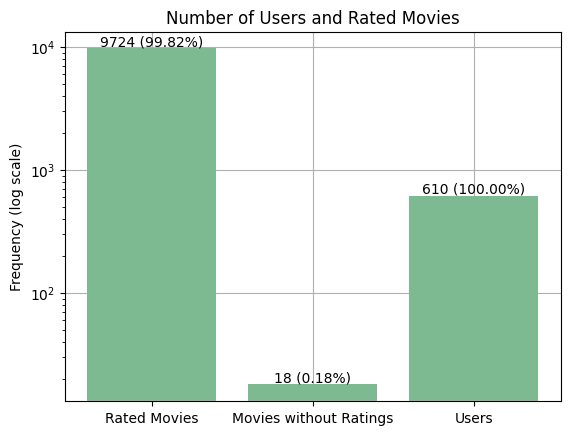

In [6]:
n_movies = df_movies['movieId'].nunique()
n_users = df_ratings['userId'].nunique()
n_rated_movies = df_ratings['movieId'].nunique()

values = [n_rated_movies, n_movies-n_rated_movies, n_users]
percentages = [(100 * value / total if total > 0 else 0) for value, total in zip(values, [n_movies, n_movies, n_users])]

fig, ax = plt.subplots()

bars = ax.bar(['Rated Movies', 'Movies without Ratings', 'Users'],
              values,
              zorder=3)

for bar, value, percentage in zip(bars, values, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, 
            f'{value} ({percentage:.2f}%)', 
            ha='center', va='bottom' if height > 0 else 'top')

ax.grid(True, zorder=0)
ax.set_ylabel('Frequency (log scale)')
ax.set_title('Number of Users and Rated Movies')
ax.set_yscale('log')

plt.show()

There are `9724` rated movies and `610` users that rated. `18` movies have no rating.

This means there are much more movies than users so the `18` movies are very much plausible.

#### Rating Averages
**Which rating is given how often on average?**

This question can be answered by overall looking at the average and the frequency of each rating:

In [12]:
print(f'Average overall rating: {df_ratings["rating"].mean():.2f}')

Average overall rating: 3.50


This is also suspected as `3.5` is the **expected value** for the MovieLens rating scale of 0-5.

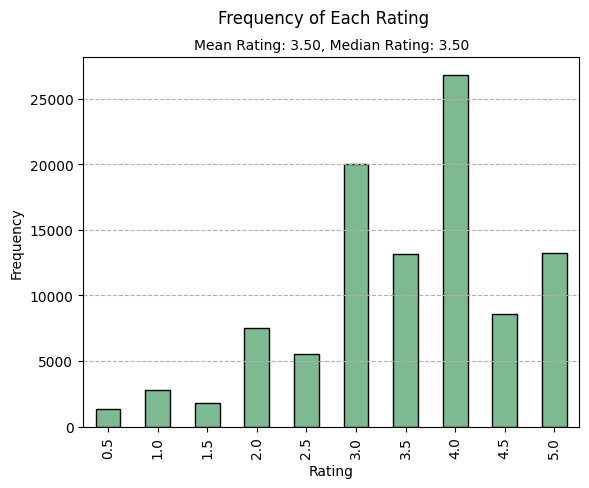

In [13]:
rating_counts = df_ratings['rating'].value_counts().sort_index()

fig, ax = plt.subplots()
rating_counts.plot(kind='bar', ax=ax, edgecolor='black')

mean_rating = df_ratings['rating'].mean()
median_rating = df_ratings['rating'].median()

fig.suptitle('Frequency of Each Rating')
ax.set_title(f'Mean Rating: {mean_rating:.2f}, Median Rating: {median_rating:.2f}', fontsize=10)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.grid(axis='y', linestyle='--')

plt.show()

The distribution overall shows a rather right-skewed distribution which is also an expected observation since human ratings usually contain a **popularity bias** and **selection bias**. 
This means users tend to only consume movies which they will like; Perhaps a friend with the same interests *recommended* the movie to them. Additionally, users also tend to only rate positive experienes - This may explain the skewness of this distribution.

#### Rating Averages per Genre
**Which rating is given how often on average per genre?**

To now look at how the same distribution looks but on a genre-level I plot the same frequency plot but for all genres.

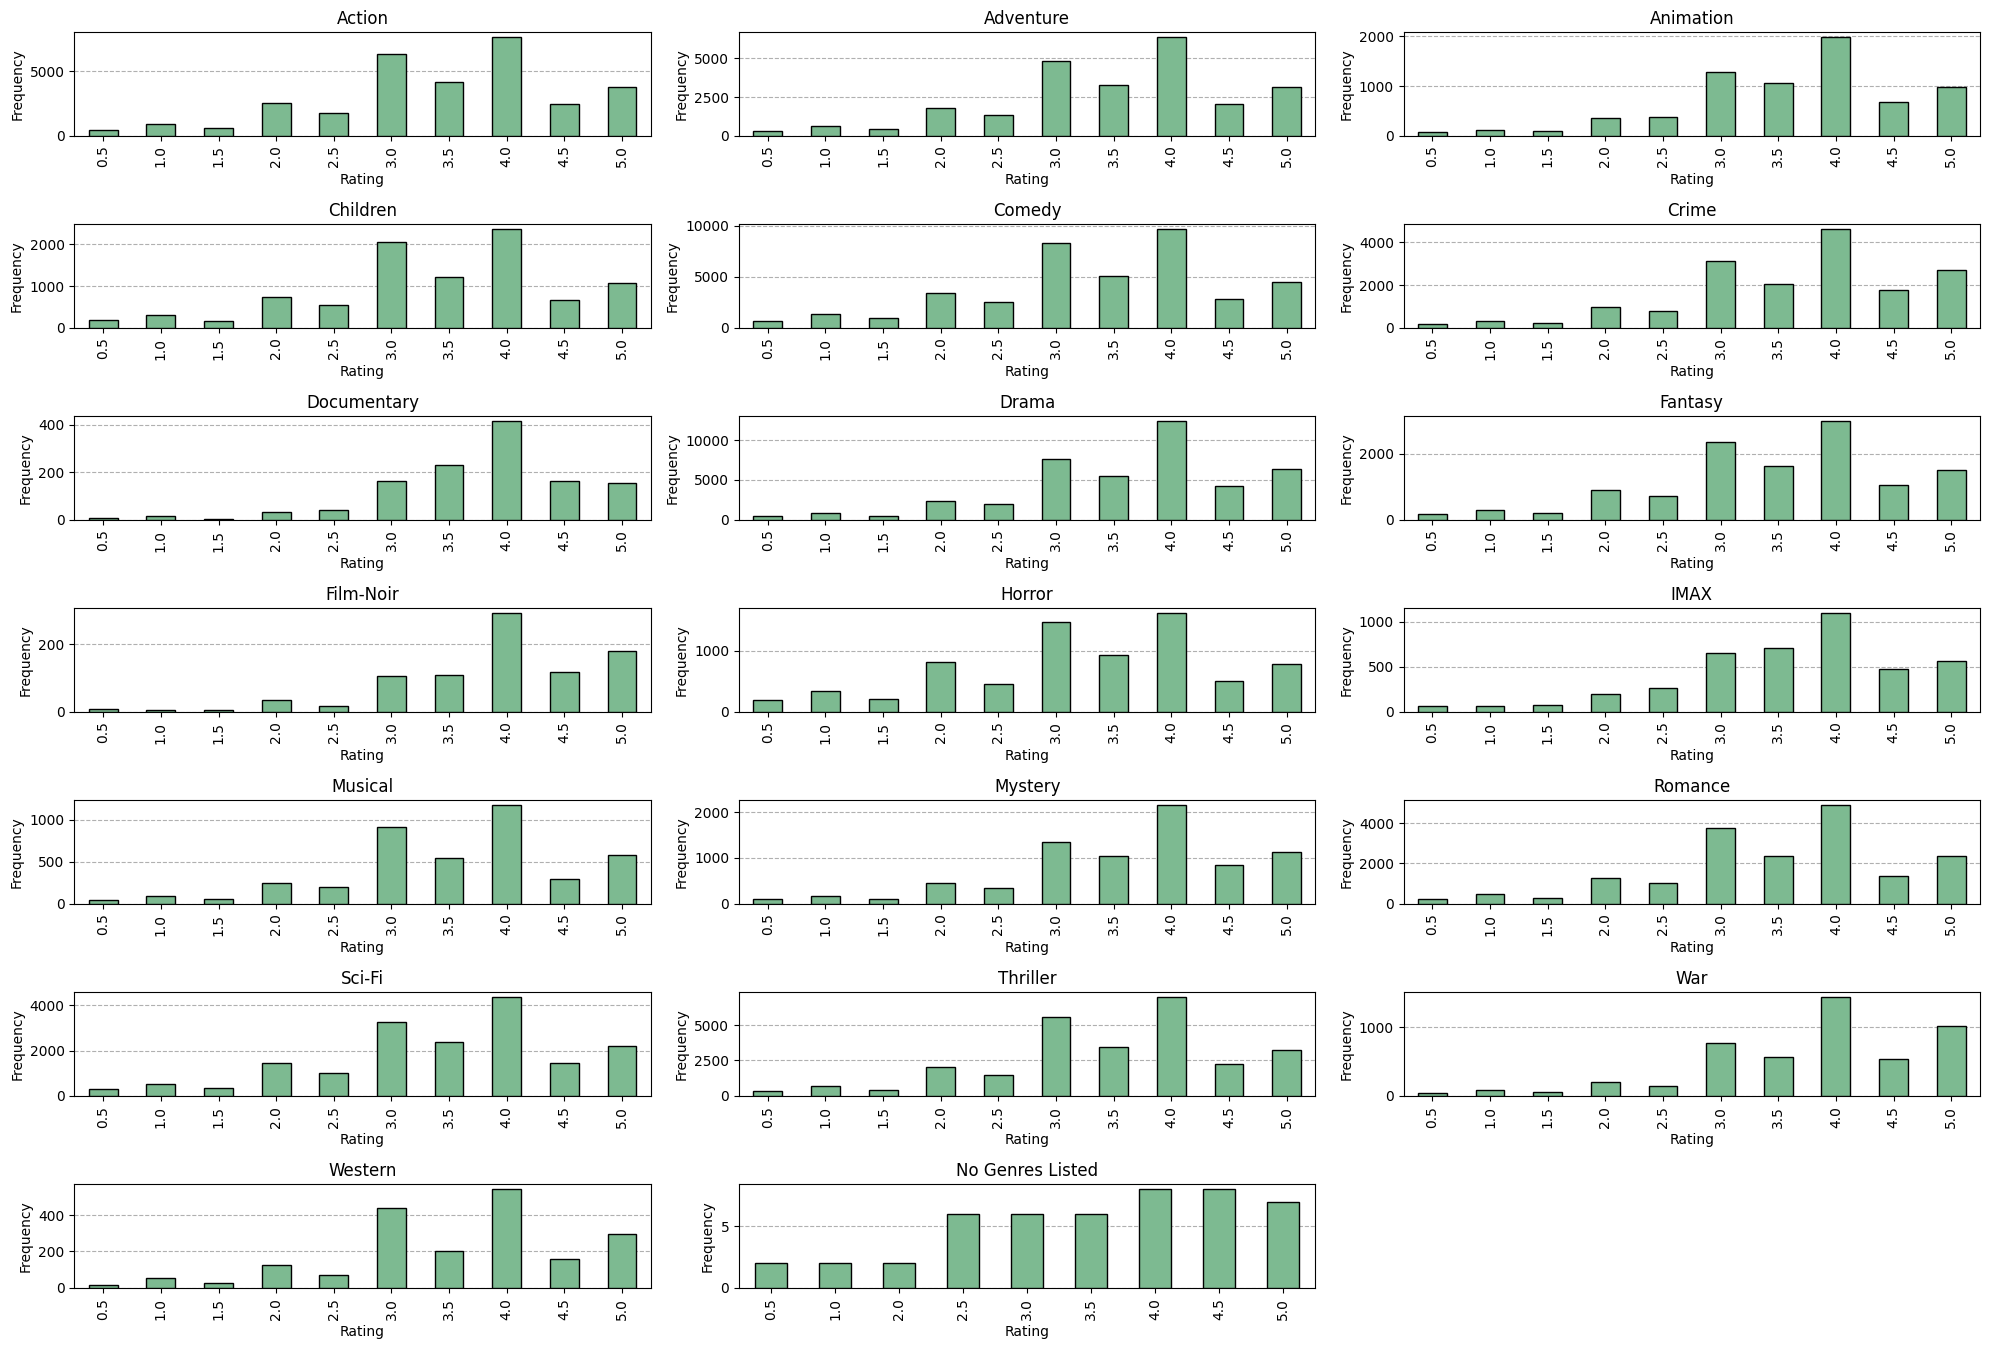

In [14]:
genres = df_movieratings.columns[7:]

plt.figure(figsize=(20, 15))
n_rows = len(genres) // 3 + (len(genres) % 3 > 0) + 1
n_cols = 3

for i, genre in enumerate(genres, start=1):
    plt.subplot(n_rows, n_cols, i)
    genre_ratings = df_movieratings[df_movieratings[genre] == 1]['rating']
    rating_counts = genre_ratings.value_counts().sort_index()

    if not rating_counts.empty:
        rating_counts.plot(kind='bar', edgecolor='black', zorder=3)
        plt.title(genre)
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
    else:
        plt.title(genre + " (No Ratings)")
    plt.grid(axis='y', linestyle='--', zorder=0)

plt.subplot(n_rows, n_cols, len(genres) + 1)
no_genres_mask = df_movieratings[genres].sum(axis=1) == 0
no_genre_ratings = df_movieratings[no_genres_mask]['rating']
no_genre_rating_counts = no_genre_ratings.value_counts().sort_index()

no_genre_rating_counts.plot(kind='bar', edgecolor='black', zorder=3)
plt.title("No Genres Listed")
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', zorder=0)

plt.tight_layout()
plt.show()

The genres generally show the same observation. Most of them have a high number of the rating `3` and `4` which will average out at around `3.5` - the expected value.

Genres like **Film-Noir**, and also **IMAX** to some extend, show a surprisingly high amount of ratings of `4` - Though, especially Film-Noir has a rather low count in ratings in general so this observation has to be taken with a grain of salt. 

#### Rating Distributions of 10 Random Movies
**How does the rating distributions of 10 random movies look?**

In this exploration I sample 10 random movies and look at their ratings.

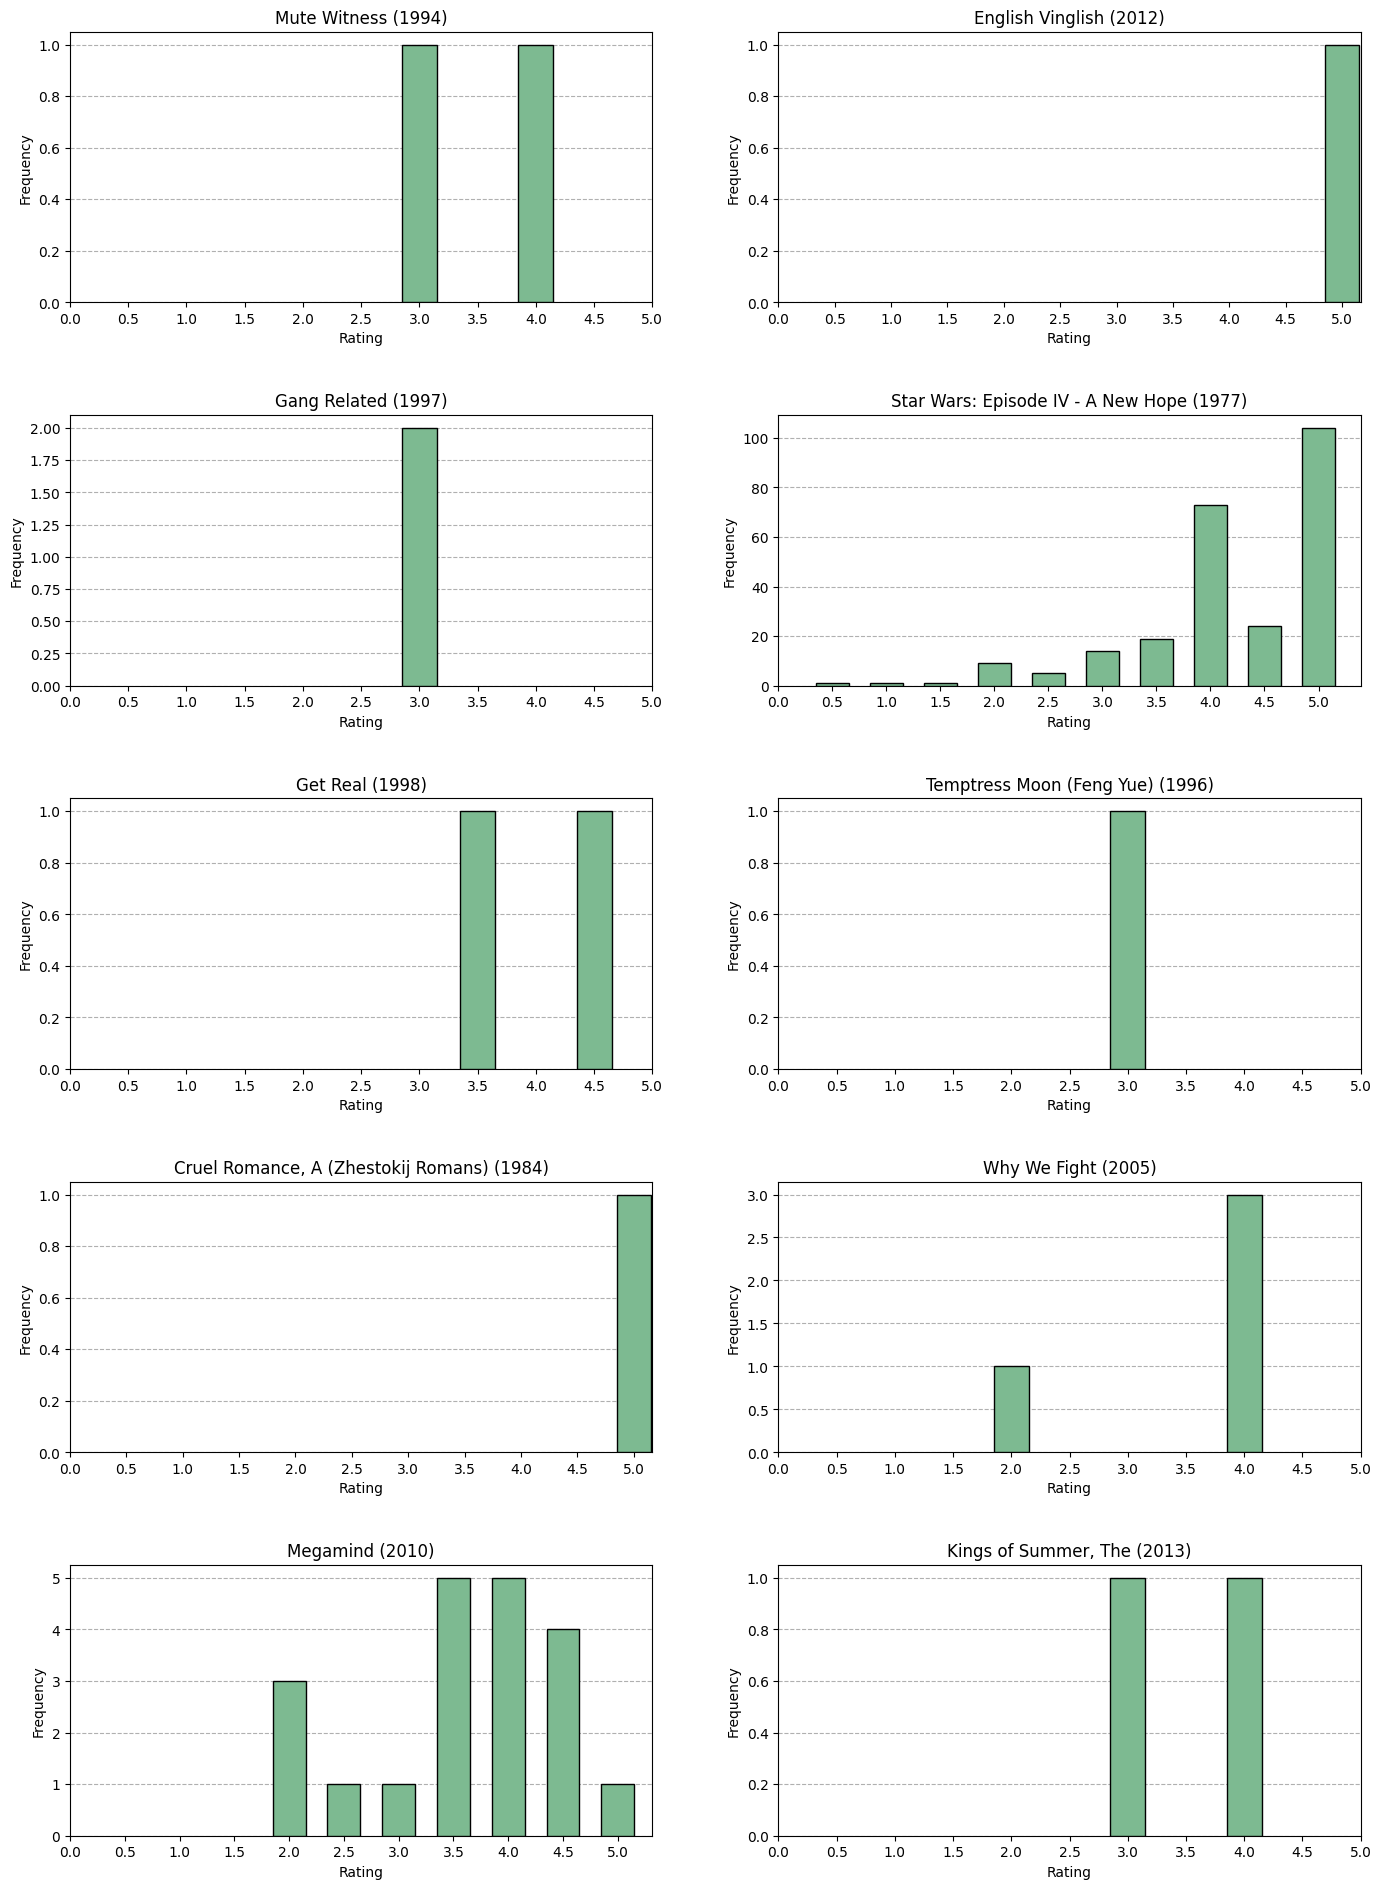

In [15]:
sampled_movies = df_movieratings['movieId'].drop_duplicates().sample(n=10, random_state=1337)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=6.0)

axes = axes.flatten()

for i, movieId in enumerate(sampled_movies):
    movie_ratings = df_movieratings[df_movieratings['movieId'] == movieId]['rating']
    rating_counts = movie_ratings.value_counts().sort_index()
    
    axes[i].bar(rating_counts.index, rating_counts.values, edgecolor='black', zorder=3, width=0.3)
    movie_title = df_movieratings.loc[df_movieratings['movieId'] == movieId, 'title'].iloc[0]
    axes[i].set_title(movie_title)
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(np.arange(0, 5.5, 0.5))
    
    axes[i].grid(axis='y', linestyle='--', zorder=0)

for ax in axes[i+1:]:
    ax.axis('off')

plt.show()

Most of the sampled movies only have a handful of ratings. The only movie which shows a similar distribution to the overall distribution is **Forrest Gump** which is the most rated movie in this dataset. For the other sampled movies we can also see that the few ratings they have usually are in the neighborhood of the mean of `3.5`. The movie **The Brothers Solomon** stands out as a very low rated movie with its only rating being at `0.5`.

#### Rating Distributions of 3 Movies I have watched
**The rating distributions of 3 movies that you have watched**

For this observation I will look at the rating distributions of my 3 favorite movies:
- American Psycho
- Blade Runner 2049
- Wolf of Wallstreet

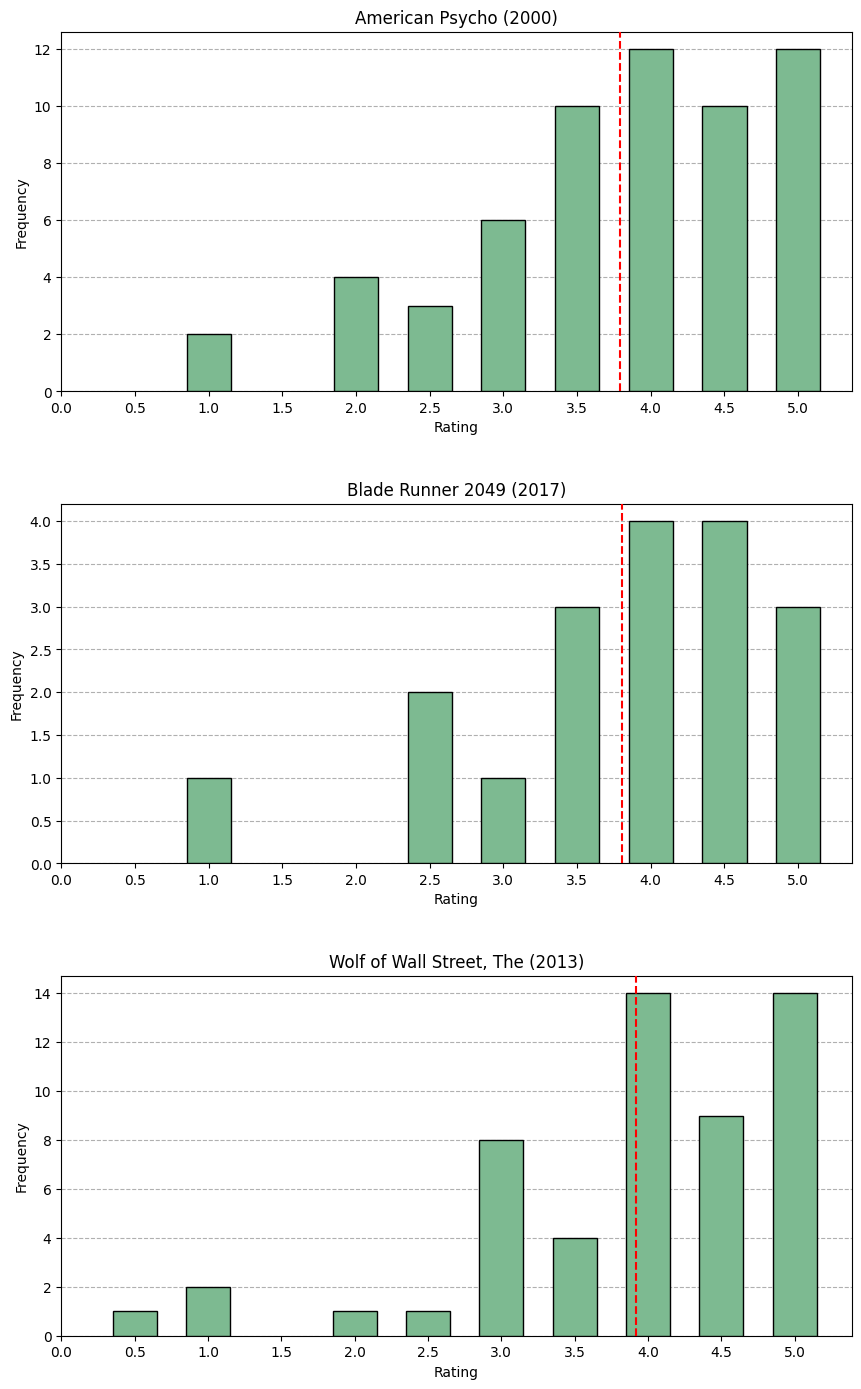

In [16]:
my_movies = ['American Psycho (2000)',
             'Blade Runner 2049 (2017)',
             'Wolf of Wall Street, The (2013)']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
fig.tight_layout(pad=6.0)

for i, movie_title in enumerate(my_movies):
    movie_ratings = df_movieratings[df_movieratings['title'] == movie_title]['rating']
    rating_counts = movie_ratings.value_counts().sort_index()
    
    axes[i].bar(rating_counts.index, rating_counts.values, edgecolor='black', zorder=3, width=0.3)
    axes[i].axvline(x=movie_ratings.mean(), color='red', linestyle='--', label='Mean Rating', zorder=3)
    axes[i].set_title(movie_title)
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(np.arange(0, 5.5, 0.5))
    
    axes[i].grid(axis='y', linestyle='--', zorder=0)
    
plt.show()

My favorite movies are very popular and we can see that their mean rating clearly stands above the overall mean rating of `3.5`. Among my 3 favorite movies we can observe that **Wolf of Wallstreet** seems to have the most high ratings among them, closely next to **American Psycho**. The movie **Blade Runner 2049** also has good ratings but generally has fewer ratings in frequency - This might be because it came out the most recent.

#### Number of Users per Average Rating
**How many users give which average rating?**

To get a good overview of how many users are behind each rating this block will create a distribution showing the number of users per rating in a resolution of `0.1` steps.

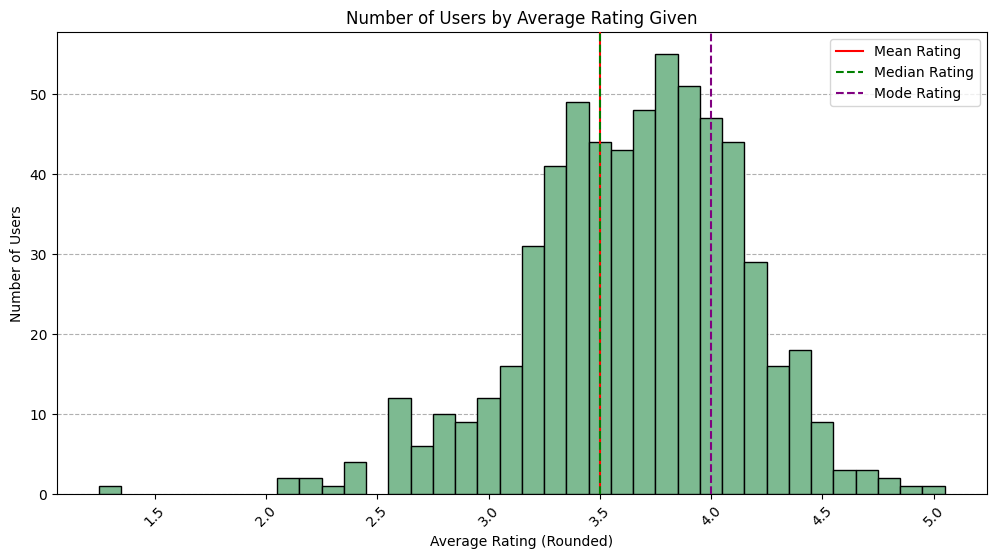

--- Distribution Metrics ---
Mean: 3.501556983616962
Median: 3.5
Mode: 4.0


In [17]:
user_avg_ratings = df_movieratings.groupby('userId')['rating'].mean().reset_index(name='avg_rating')

user_avg_ratings['avg_rating_rounded'] = user_avg_ratings['avg_rating'].round(1)

avg_rating_counts = user_avg_ratings['avg_rating_rounded'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.bar(avg_rating_counts.index, avg_rating_counts.values, zorder=3, width=0.1, edgecolor='black')

plt.axvline(x=df_ratings['rating'].mean(), color='red', label='Mean Rating', zorder=3)
plt.axvline(x=df_ratings['rating'].median(), color='green', linestyle='--', label='Median Rating', zorder=3)
plt.axvline(x=df_ratings['rating'].mode().iloc[0], color='purple', linestyle='--', label='Mode Rating', zorder=3)
plt.legend()

plt.title('Number of Users by Average Rating Given')
plt.xlabel('Average Rating (Rounded)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', zorder=0)
plt.show()

print('--- Distribution Metrics ---')
print(f'Mean: {df_ratings["rating"].mean()}')
print(f'Median: {df_ratings["rating"].median()}')
print(f'Mode: {df_ratings["rating"].mode().iloc[0]}')

The ratings look nearly normally distributed, the average rating given the most is `3.8`. The distribution is slightly more left skewed and therefore the mean rating gets pulled further from the mode.

#### Number of Movie Ratings as a function of Average Rating
**How often a movie was rated as a function of average rating**

To see how the average movie gets rated I will use a kernel density plot with the marginal distributions of the underlying scatters.

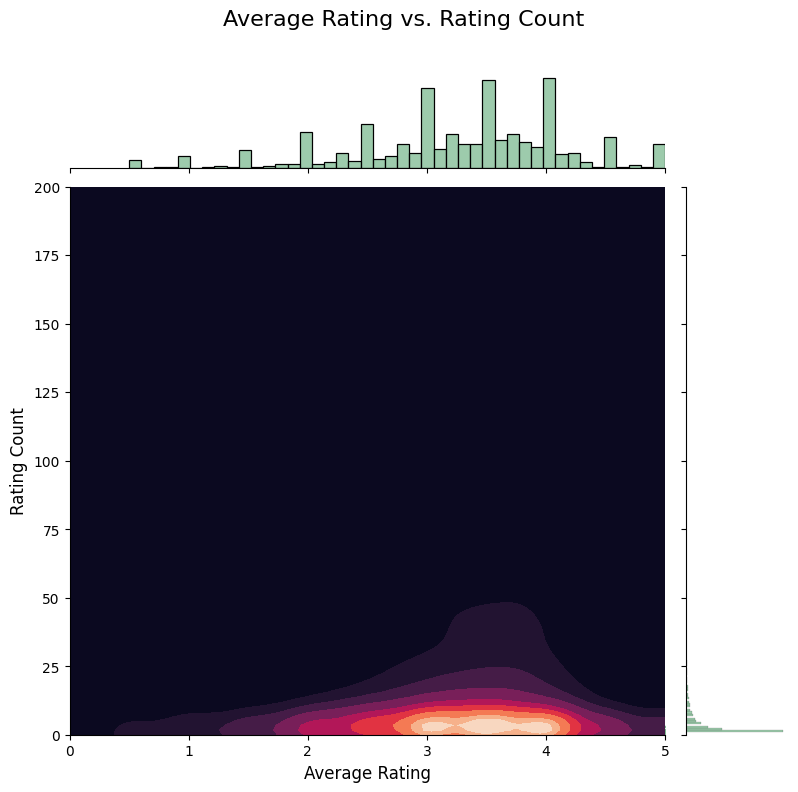

In [19]:
movie_stats = df_movieratings.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

g = sns.jointplot(x='avg_rating', y='rating_count', data=movie_stats, kind='scatter', height=8)
g.plot_joint(sns.kdeplot, fill=True, clip=((0, 5), (0, 400)), thresh=0, levels=10, cmap="rocket")
g.set_axis_labels('Average Rating', 'Rating Count', fontsize=12)
plt.ylim(0, 200)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Rating vs. Rating Count', fontsize=16)
plt.show()

The plot also shows that most of the average movie ratings lie between `3` and `4`. The brightest density level also shows a "bubble" in the center of the two, meaning it lies at `3.5`. Another interesting observation is the histogram on the x-axis, showing how integer ratings have a higher frequency than granular ratings between. Users probably found it easier to rate movies with integer numbers and didn't put too much thought into the process of rating that would add decimals.

#### User Item Matrix (UIM)
**A heatmap of the User Item Matrix**

The following heatmap shows the entirety of the User Rating Matrix. Every row represents a user and every column an item. The following numbers on the axes show arbitrary Ids that get selected by `seaborn` - They are just a rough indication of where the heatmap shows which movies or users. 

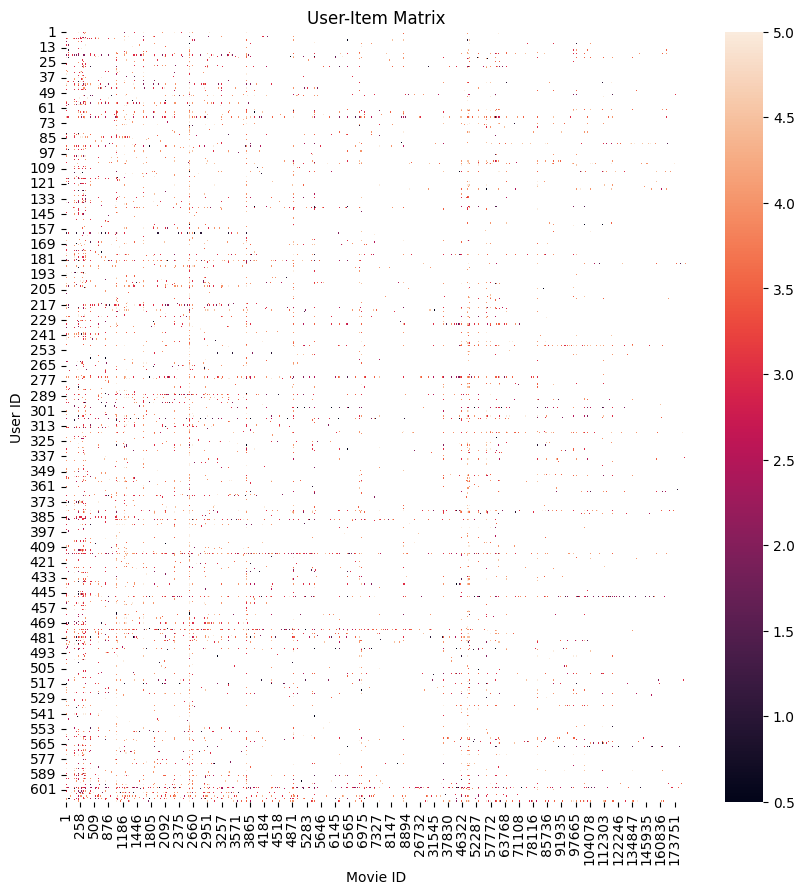

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(user_item_matrix)
plt.title('User-Item Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

Since the matrix shows all ratings of the `610` users and `9724` items it is quite hard to make detailed assumptions. But generally we can see horizontal "lines" of users that like to rate movies a lot and vertical "lines" of movies that get rated a lot. For example, Forrest Gump, the most rated movie in the data set has the Id `356` - This Id is in one of the few visible lines between the shown Movie ID `258` and `509`.

#### User Item Matrix (UIM) for the 100 Most Rated movies for the 50 Users with most Ratings
**A heatmap of the User Item Matrix for the 100 most rated movies for the 50 users with most ratings**

This heatmap shows the User Rating Matrix for only the 100 most rated movies and 50 users who rate the most so its details should be clearer.

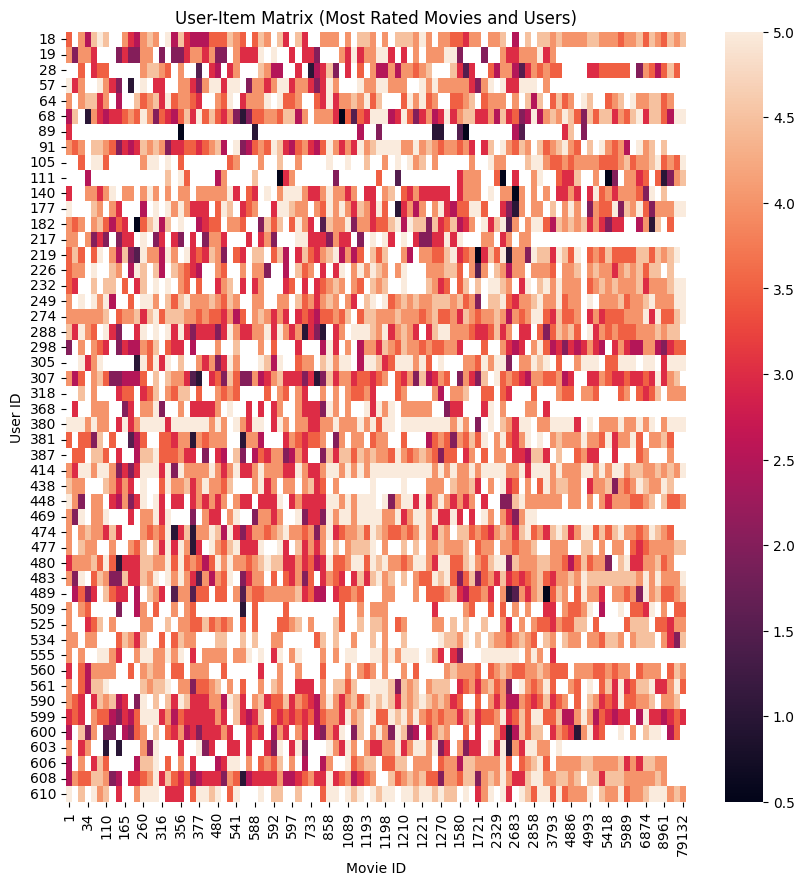

In [21]:
n_most_rated = 100
n_most_rated_users = 50

most_rated_movies = df_movieratings['movieId'].value_counts().head(n_most_rated).index
most_rated_users = df_movieratings['userId'].value_counts().head(n_most_rated_users).index

df_most_rated = df_movieratings[
    df_movieratings['movieId'].isin(most_rated_movies) &
    df_movieratings['userId'].isin(most_rated_users)
]

df_most_rated_features = df_most_rated.pivot(
    index='userId',
    columns='movieId',
    values='rating'
)

plt.figure(figsize=(10, 10))
sns.heatmap(df_most_rated_features)
plt.title('User-Item Matrix (Most Rated Movies and Users)')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

As expected we now can see a much less sparse matrix since we plot the most rated movies and most rating users.

An interesting observation in this plot especially is User `89` who only has a few ratings compared to the other users but of the movies they rated almost only low ratings below `1` seem to have been given.

#### Result Gathering (Exercise 10)
This following class controls the gathering of results. It belongs to exercise 10 which will compare all following Recommenders.

In [133]:
class ResultStore:
    def __init__(self):
        self.df = pd.DataFrame(columns=[
            'recommender_name', 'rmse', 'best_parameters', 'average_precision_at_k', 'average_recall_at_k'
        ])

    def add_result(self, 
                   recommender_name, 
                   rmse, 
                   mae,
                   best_parameters, 
                   precision_at_k, 
                   recall_at_k,
                   exercise: int,
                   results=None):
        new_entry = {
            'exercise': exercise,
            'recommender_name': recommender_name,
            'rmse': rmse,
            'mae': results[str(best_parameters)][3] if results is not None else mae,
            'best_parameters': best_parameters,
            'average_precision_at_k': results[str(best_parameters)][1] if results is not None else precision_at_k,
            'average_recall_at_k': results[str(best_parameters)][2] if results is not None else recall_at_k
        }
        self.df.loc[len(self.df)] = new_entry
        print(f'✅ Result added!')

    def get_results(self):
        return self.df
    
    def drop_results(self):
        self.df = pd.DataFrame(columns=[
            'recommender_name', 'rmse', 'best_parameters', 'average_precision_at_k', 'average_recall_at_k'
        ])
        print(f'✅ Result list emptied!')

    def save_results(self, filepath):
        self.df.to_csv(filepath, index=False)
        print(f'✅ Results saved to {filepath}!')

    def load_results(self, filepath):
        self.df = pd.read_csv(filepath)
        
result_store = ResultStore()

### Exercise 2 - Building a baseline RS (7 points)
In this exercise we will build a baseline RS and functions to calculate fundamental performance metrics. 

Build the following baseline RS to predict Top-N (default N=20):
1. In reference to the book *Collaborative Filtering Recommender Systems by Michael D. Ekstrand, John T. Riedl and Joseph A. Konstan* (p. 91ff) implement the baseline predictor $$ b_{u,i}= \mu +b_u +b_i $$ with the regularized user and item average offsets: $$ b_u = \frac{1}{|I_u| + \beta_u} \sum_{i \in I_u} (r_{u,i} - \mu) $$ and $$ b_i = \frac{1}{|U_i| + \beta_i} \sum_{u \in U_i} (r_{u,i} - b_u - \mu) . $$ Build a recommender system upon this baseline predictor. Set the default damping factors $\beta_u$ and $\beta_i$ both to 20.
2. Build a RS that recommends based on *random* recommendations.  

Output the recommendations for three example users of your choice. Can you find a user that represents your taste? 

#### Baseline Recommender System
The following `BaselineRecommender` was built according to the described formulas.

Functions:
- `predict`: The predict function will take in a single user Id and a single movie Id and return a predicted rating according to the baseline estimator $b_{u,i}=\mu+b_u+b_i$
- `predict_multiple`: This function will do the same as the `predict` function but it offers a vectorized approach for inference; This means it allows for multiple user and item Ids to be passed and predicted.
- `recommend`: The recommend function will predict the `top_n`-specified number of movies to user `user_id`. When called, it will only recommend movies that haven't been interacted with yet by the user.

In [103]:
class BaselineRecommender():
    def __init__(self, beta_u=20, beta_i=20, top_n=20):
        self.beta_u = beta_u
        self.beta_i = beta_i
        self.top_n = top_n

    def fit(self, X):
        self.X_ = X.copy()
        self.global_mean_ = np.nansum(self.X_.flatten())/np.sum(~np.isnan(self.X_))
        
        self.I_u = np.sum(~np.isnan(self.X_), axis=1)
        self.U_i = np.sum(~np.isnan(self.X_), axis=0)
        
        self.b_u = (np.nansum(self.X_ - self.global_mean_, axis=1)) / (self.I_u + self.beta_u)
        self.b_i = (np.nansum(self.X_ - self.b_u.reshape(-1, 1) - self.global_mean_, axis=0)) / (self.U_i + self.beta_i)
        
        return self
    
    def predict(self, user_id=None, item_id=None):
        b_u = self.b_u[user_id - 1] if user_id is not None else 0
        b_i = self.b_i[item_id - 1]
        pred_rating = self.global_mean_ + b_u + b_i
        return pred_rating
    
    def predict_multiple(self, user_ids, item_ids):
        user_ids_adjusted, item_ids_adjusted = user_ids, item_ids

        b_u = self.b_u[user_ids_adjusted]
        b_i = self.b_i[item_ids_adjusted]

        predictions = self.global_mean_ + b_u + b_i

        original_ratings = self.X_[user_ids_adjusted, item_ids_adjusted]

        unrated_mask = np.isnan(original_ratings)
        original_ratings[unrated_mask] = predictions[unrated_mask]

        return original_ratings
    
    def recommend(self, user_id):
        recommendations = []
        for movie_id in range(1, self.X_.shape[1] + 1):
            if np.isnan(self.X_[user_id, movie_id - 1]):
                recommendations.append((movie_id, self.predict(user_id, movie_id)))
        recommendations.sort(key=lambda x: x[1], reverse=True)
        
        return recommendations[:self.top_n]

#### Random Recommender System
The `RandomRecommender` will instantiate an rng-instance to then recommend random item Ids to the users using the `recommend` function.

In [119]:
class RandomRecommender:
    def __init__(self, top_n=20, random_state=1337, n_movies=9724):
        self.top_n = top_n
        self.random_state = random_state
        self.rng = np.random.default_rng(random_state)

    def fit(self, X):
        self.X_ = X
        return self

    def recommend(self, user_id):
        recommendations = []

        for _ in range(self.top_n):
            movie_id = self.rng.choice(self.X_.shape[1], replace=False) + 1
            rating = self.rng.choice(6)

            recommendations.append((movie_id, rating))

        recommendations.sort(key=lambda x: x[1], reverse=True)

        return recommendations

#### Recommending to three random users
The following codeblock instantiates the defined recommenders (Baseline and Random) and samples 3 random users to recommend to.

In [110]:
def plausibility_check(estimator, n_recs, n_users, random_seed=1337, user_item_matrix=user_item_matrix.values, df_movies=df_movies):
    np.random.seed(random_seed)
    user_ids = np.random.choice(user_item_matrix.shape[0], n_users, replace=False)
    
    estimator_name = estimator.__class__.__name__

    print(f'--- ⚙️ {estimator_name} Plausibility Check ---\n')
    for user_id in user_ids:
        recommendations = []
        
        print(f"⭐ User {user_id} Recommendations")
        recommendations = estimator.recommend(user_id-1)
        
        df_recs = pd.DataFrame(recommendations, columns=['movieId', 'predicted_rating'])
        df_recs = pd.merge(df_recs, df_movies, how='inner', left_on='movieId', right_on='movieId_seq')[:n_recs]
        
        display(df_recs[['title', 'predicted_rating']])
        
    print()

In [125]:
baseline_recommender = BaselineRecommender(beta_u=20, beta_i=20, top_n=5)
random_recommender = RandomRecommender(top_n=5, random_state=1337)

baseline_recommender.fit(user_item_matrix.values)
random_recommender.fit(user_item_matrix.values)

plausibility_check(baseline_recommender, n_recs=5, n_users=3)
plausibility_check(random_recommender, n_recs=5, n_users=3)

--- ⚙️ BaselineRecommender Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,"Usual Suspects, The (1995)",4.404634
1,"Godfather, The (1972)",4.399418
2,Home Alone 2: Lost in New York (1992),4.399185
3,Dr. Strangelove or: How I Learned to Stop Worr...,4.395889
4,Star Wars: Episode V - The Empire Strikes Back...,4.368363


⭐ User 80 Recommendations


,title,predicted_rating
0,Dr. Strangelove or: How I Learned to Stop Worr...,4.615774
1,Star Wars: Episode IV - A New Hope (1977),4.605689
2,Star Wars: Episode V - The Empire Strikes Back...,4.588248
3,12 Angry Men (1957),4.587725
4,Cheech and Chong's Up in Smoke (1978),4.587484


⭐ User 545 Recommendations


,title,predicted_rating
0,"Shawshank Redemption, The (1994)",4.688030
1,"Usual Suspects, The (1995)",4.541558
2,"Godfather, The (1972)",4.536341
3,Home Alone 2: Lost in New York (1992),4.536108
4,Dr. Strangelove or: How I Learned to Stop Worr...,4.532812



--- ⚙️ RandomRecommender Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,AVP: Alien vs. Predator (2004),5
1,Overboard (1987),5
2,Rain (2001),5
3,F/X (1986),5
4,Ice Age: Dawn of the Dinosaurs (2009),1


⭐ User 80 Recommendations


,title,predicted_rating
0,"Passenger, The (Professione: reporter) (1975)",5
1,St. Elmo's Fire (1985),2
2,Gypsy (1962),2
3,Dead Man (1995),1
4,Valley Girl (1983),0


⭐ User 545 Recommendations


,title,predicted_rating
0,Oblivion 2: Backlash (1996),4
1,There's Something About Mary (1998),2
2,Broadway Danny Rose (1984),1
3,Sleepy Hollow (1999),0
4,"Cannonball Run, The (1981)",0


The plausibility check also shows the expected "popularity bias". The `BaselineRecommender` seems to mainly predict relatively famous movies.

### Exercise 3 - Evaluation methods (8 points)

Implement a function to partition your dataset for an offline evaluation based on holding out of random users with 5x cross validation. *Use this for all further exercises*
Explain your considerations.

Implement functions to calculate the following metrics:
- *Mean Absolute Error (MAE)* 
- *Root Mean Square Error (RMSE)*
- *Precision@N* with default $N=15$ and relevance threshold 3.5 stars.
- *Recall@N* with default $N=15$ and relevance threshold 3.5 stars.

Explain each of these.

Note: For the last two see https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54. 

#### Metrics
The metrics are defined as follows:
- **Mean Absolute Error**: $\text{MAE}=\frac{1}{n}\sum_{i=1}^n|\hat{y_i}-y_i|$ where $n$ is the number of predictions made, $\hat{y}$ the predicted values and $y$ the actual values (ground truth).
- **Root Mean Squared Error**: $\text{RMSE}=\sqrt{\sum_{i=1}^n\frac{(\hat{y_i}-y_i)^2}{n}}$
- **Precision@K**: $\text{Precision@K}=\frac{\text{number of relevant items in k}}{k}$ where $k$ is the number of recommendations made. The relevant items are those in the list of $K$ that are at least the value of the threshold. The threshold is usually set at the expected value, so in our case of the 0-5 Rating scale that will be `3.5`.
- **Recall@K**: $\text{Recall@K}=\frac{\text{number of recommendations that are relevant in k}}{\text{number of all possibly relevant items}}$

In [107]:
def mean_absolute_error(predictions, actuals):
    ae = np.abs(predictions - actuals)
    mae = np.nanmean(ae)
    return mae

def root_mean_squared_error(predictions, actuals):
    se = np.square(predictions - actuals)
    rmse = np.sqrt(np.nanmean(se))
    return rmse

def precision_at_k(y_pred, y_true, k=15, threshold=3.5):
    relevant = y_true >= threshold

    pred_sorted_indices = np.argsort(y_pred)[::-1]

    top_k_indices = pred_sorted_indices[:k]
    relevant_top_k = relevant[top_k_indices]

    precision = np.sum(relevant_top_k) / k if k else 0
    
    return precision

def recall_at_k(y_pred, y_true, k=15, threshold=3.5):
    relevant = y_true >= threshold

    if not np.any(relevant):
        return 0

    pred_sorted_indices = np.argsort(y_pred)[::-1]

    top_k_indices = pred_sorted_indices[:k]
    relevant_top_k = relevant[top_k_indices]
    
    recall = np.sum(relevant_top_k) / np.sum(relevant)
    
    return recall

#### Cross Validation Fold for Recommenders
The issue with offline recommender systems is that they rely on predictions made with user and item identifiers. If we would go the classic route of splitting off users in a fold that would mean we split our user rating matrix on row-basis. If we then take the example of the `BaselineRecommender`, which fits and recommends based on the entire matrix, we run into a problem - A fold can have users that the fitted recommender doesn't have.

To counter this issue I introduced the `MaskPercentageKFoldMatrix`-CV Fold. It somewhat mimics the `LeaveOneOut`-KFold from Surprise which can be found [here](https://surprise.readthedocs.io/en/stable/_modules/surprise/model_selection/split.html#KFold:~:text=%5Bdocs%5D-,class%20LeaveOneOut%3A,-%22%22%22Cross%2Dvalidation%20iterator). But instead of taking in an argument that controls how much of each user will be retained and not "masked" I implement a `mask_ratio` since I found it dangerous in this dataset to set a fixed number of ratings that will be left out. With this masking-ratio approach we can prevent that users with an already low amount of ratings entirely get masked and "ignored" and thus having a biased impact by being completely left out.

**Split Method in detail:**
1. It first checks if the number of splits (`n_splits`) is appropriate given the number of users in the matrix. It raises an error if the number of splits is less than 2 or more than the number of users, which ensures that each fold has at least one user.
2. Depending on the `shuffle` parameter, it shuffles the user indices to randomize the order of users. This step is important to prevent any potential bias due to the order in which users are listed in the original dataset.
3. The shuffled or ordered list of user indices is then divided into `n_splits` folds. This ensures each fold will serve as a test set during one of the rounds of cross-validation, while the remaining folds collectively make up the training set.
4. Creating Test and Train Masks:
    - For each fold used as the test set, a binary mask for both the training and testing data is created. Initially, all entries in the train mask are set to True (indicating that they are available for training) and all entries in the test mask are set to `False`.
    - For each user in the test fold, a certain percentage (`mask_ratio`) of their known interactions (non-NaN values) is randomly selected to be masked. These interactions are then marked as `True` in the test mask (indicating they are withheld from training and used for testing) and `False` in the training mask.
5. Applying Masks:
    - Using the masks created, the method constructs the training and testing matrices. In the training matrix, interactions selected for testing are set to `NaN`, indicating that they are not available during model training. Conversely, in the testing matrix, only the selected interactions are visible (non-NaN), and all other interactions are set to `NaN`.

In [118]:
class MaskPercentageKFoldMatrix:
    def __init__(self, n_splits=5, mask_ratio=.5, random_state=None, shuffle=True):
        self.n_splits = n_splits
        self.mask_ratio = mask_ratio
        self.shuffle = shuffle
        self.random_state = random_state

    def split(self, user_item_matrix):
        num_users, num_items = user_item_matrix.shape
        if self.n_splits < 2 or self.n_splits > num_users:
            raise ValueError(f"Incorrect value for n_splits={self.n_splits}. Must be >=2 and <= number of users ({num_users})")

        user_indices = np.arange(num_users)
        rng = np.random.default_rng(self.random_state) if self.random_state is not None else np.random.default_rng()
        if self.shuffle:
            rng.shuffle(user_indices)

        fold_indices = np.array_split(user_indices, self.n_splits)

        for fold_i in range(self.n_splits):
            train_indices = np.hstack(fold_indices[:fold_i] + fold_indices[fold_i+1:])
            test_indices = fold_indices[fold_i]

            train_mask = np.full(user_item_matrix.shape, True)
            test_mask = np.full(user_item_matrix.shape, False)

            for user in test_indices:
                user_ratings = np.where(~np.isnan(user_item_matrix[user]))[0]
                hold_out_count = max(1, int(len(user_ratings) * self.mask_ratio))
                rng.shuffle(user_ratings)
                hold_out_ratings = user_ratings[:hold_out_count]
                
                test_mask[user, hold_out_ratings] = True
                train_mask[user, hold_out_ratings] = False

            train_data = np.where(train_mask, user_item_matrix, np.nan)
            test_data = np.where(test_mask, user_item_matrix, np.nan)

            yield train_data, test_data

#### Grid Search Functionality
The entire grid search functionality was split up in two separate functions, one being the `evaluate_parameters` and one the `grid_search_cv` function which acts as the main interface.

Both functions will be described after the next block since they both depend on each other.

In [120]:
from joblib import Parallel, delayed
from surprise import AlgoBase, Dataset, Reader

def evaluate_parameters(X_train, X_test, estimator, params, k=15, threshold=3.5):
    if issubclass(estimator, AlgoBase):
        estimator.seed = 1337
        reader = Reader(rating_scale=(1, 5))
        
        train_data = [(uid, iid, X_train[uid, iid]) for uid, iid in zip(*np.where(~np.isnan(X_train)))]
        train_df = pd.DataFrame(train_data, columns=['uid', 'iid', 'rating'])
        trainset = Dataset.load_from_df(train_df, reader).build_full_trainset()
        
        test_data = [(uid, iid, X_test[uid, iid]) for uid, iid in zip(*np.where(~np.isnan(X_test)))]
        test_df = pd.DataFrame(test_data, columns=['uid', 'iid', 'rating'])
        testset = Dataset.load_from_df(test_df, reader).build_full_trainset().build_testset()

        algo = estimator(**params)
        algo.fit(trainset)
        
        predictions = algo.test(testset)
        
        y_pred = np.array([pred.est for pred in predictions])
        y_true = np.array([pred.r_ui for pred in predictions])
        
        user_recall, user_precision, user_mae = [], [], []
        for uid in np.unique([pred.uid for pred in predictions]):
            user_preds = [pred.est for pred in predictions if pred.uid == uid]
            user_actuals = [pred.r_ui for pred in predictions if pred.uid == uid]
            user_recall.append(recall_at_k(user_preds, user_actuals, k, threshold))
            user_precision.append(precision_at_k(user_preds, user_actuals, k, threshold))
            user_mae.append(mean_absolute_error(user_preds, user_actuals))
        
        recall = np.mean(user_recall)
        precision = np.mean(user_precision)
        mae = np.mean(user_mae)
    else:
        current_estimator = estimator(**params)
        current_estimator.fit(X_train)

        predictions = np.full(X_test.shape, np.nan)
        user_indices, item_indices = np.where(~np.isnan(X_test))
        
        if hasattr(current_estimator, "predict_multiple"):
            predictions_batch = current_estimator.predict_multiple(user_indices, item_indices)
            predictions[user_indices, item_indices] = predictions_batch
        else:
            for u, i in zip(user_indices, item_indices):
                predictions[u, i] = current_estimator.predict(u, i)
        
        valid_mask = ~np.isnan(X_test)
        valid_predictions = predictions[valid_mask]
        valid_actuals = X_test[valid_mask]
        
        y_pred = valid_predictions
        y_true = valid_actuals
        
        user_recall, user_precision, user_mae = [], [], []
        for uid in np.unique(user_indices):
            user_mask = user_indices == uid
            
            user_preds = valid_predictions[user_mask]
            user_actuals = valid_actuals[user_mask]
            
            user_recall.append(recall_at_k(user_preds, user_actuals, k, threshold))
            user_precision.append(precision_at_k(user_preds, user_actuals, k, threshold))
            user_mae.append(mean_absolute_error(user_preds, user_actuals))
        
        recall = np.mean(user_recall)
        precision = np.mean(user_precision)
        mae = np.mean(user_mae)

    rmse = root_mean_squared_error(y_true, y_pred)
    
    return rmse, precision, recall, mae

As already stated, the `grid_search_cv` function works as the main interface to start a new **Grid Search**. It first creates the explained `MaskPercentageKFoldMatrix`-Fold and then the parameter combinations which are passed in "sklearn-like" within a dictionary. It then iterates through these combinations to evaluate each variant with the `evaluate_parameters` function either paralellized or in a single thread, depending on the attribute `parallel=True`.

The `evaluate_parameters` function then checks if the passed in estimator is a `surprise` estimator or not:
- If it is a `surprise` estimator it will first wrap the folds into a `Dataset` object and then fit the estimator, otherwise it will skip this step. After fitting it will start to predict ratings for every user in that split and generally for every item in the dataset. Since the metrics **Precision@K** and **Recall@K** describe ranking metrics, they will get calculated for every user and their recommendation. After iterating through all users in that split it will average these two recommendation metrics. At last, also the RMSE will be calculated for the entire fold. At that point the function has done its deeds and will return the metrics to the `grid_search_cv` function.
- After all folds were fitted and used for prediction the three metrics (RMSE, Precision@K and Recall@K) get averaged across the folds for their parameter combination.
This process will then be repeated for every combination.

The `grid_search_cv` function will at last return the best combination of parameters, their RMSE and a list of all gathered results for all combinations.

In [127]:
import itertools

def grid_search_cv(X, estimator, param_grid, n_splits=5, mask_ratio=.5, k=15, threshold=3.5, random_state=1337, parallel=True):
    kf = MaskPercentageKFoldMatrix(n_splits=n_splits, shuffle=True, random_state=random_state, mask_ratio=mask_ratio)
    param_combinations = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    
    results = {}

    for params in param_combinations:
        metrics = Parallel(n_jobs=-1)(
            delayed(evaluate_parameters)(X_train, X_test, estimator, params, k, threshold)
            for X_train, X_test in kf.split(X)
        ) if parallel else [
            evaluate_parameters(X_train, X_test, estimator, params, k, threshold)
            for X_train, X_test in kf.split(X)
        ]
        avg_rmse = np.mean([m[0] for m in metrics])
        avg_precision = np.mean([m[1] for m in metrics])
        avg_recall = np.mean([m[2] for m in metrics])
        avg_mae = np.mean([m[3] for m in metrics])
        
        results[str(params)] = (avg_rmse, avg_precision, avg_recall, avg_mae)
    
    best_params = None
    best_rmse = float('inf')
    
    for params, metrics in results.items():
        avg_rmse = metrics[0]
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_params = eval(params)
    
    return best_params, best_rmse, results

### Exercise 4 - Optimize hyperparameters of baseline RS (4 points)
Optimize the hyperparameters $\beta_u$ and $\beta_i$ for the baseline RS from exercise 2 using the RMSE metric. You can use the `GridSearchCV` class from scikit-learn to perform the grid search. To save computation time find a reasonable maximum value for the betas. Explain your approach and your solution.
Plot the RMSE as a function of the betas and output all metrics implemented in exercise 3 achieved at the best RMSE value.

#### Grid Search on the Baseline Recommender

The following section shows the Grid Search process for the `BaselineRecommender`. 

The chosen parameters show dampening factors from a wide range and a `masking_ratio` of `0.3`, meaning at least 30% of ratings of the users in the test set will be withheld.

In [128]:
param_grid = {
    'beta_u': [1, 5, 10, 15, 20, 50, 100],
    'beta_i': [1, 5, 10, 15, 20, 50, 100]
}

best_params, best_rmse, results = grid_search_cv(user_item_matrix.values, BaselineRecommender, param_grid, mask_ratio=0.3)

To make it easy to plot the parameters of the Baseline Recommender, the following function was built:

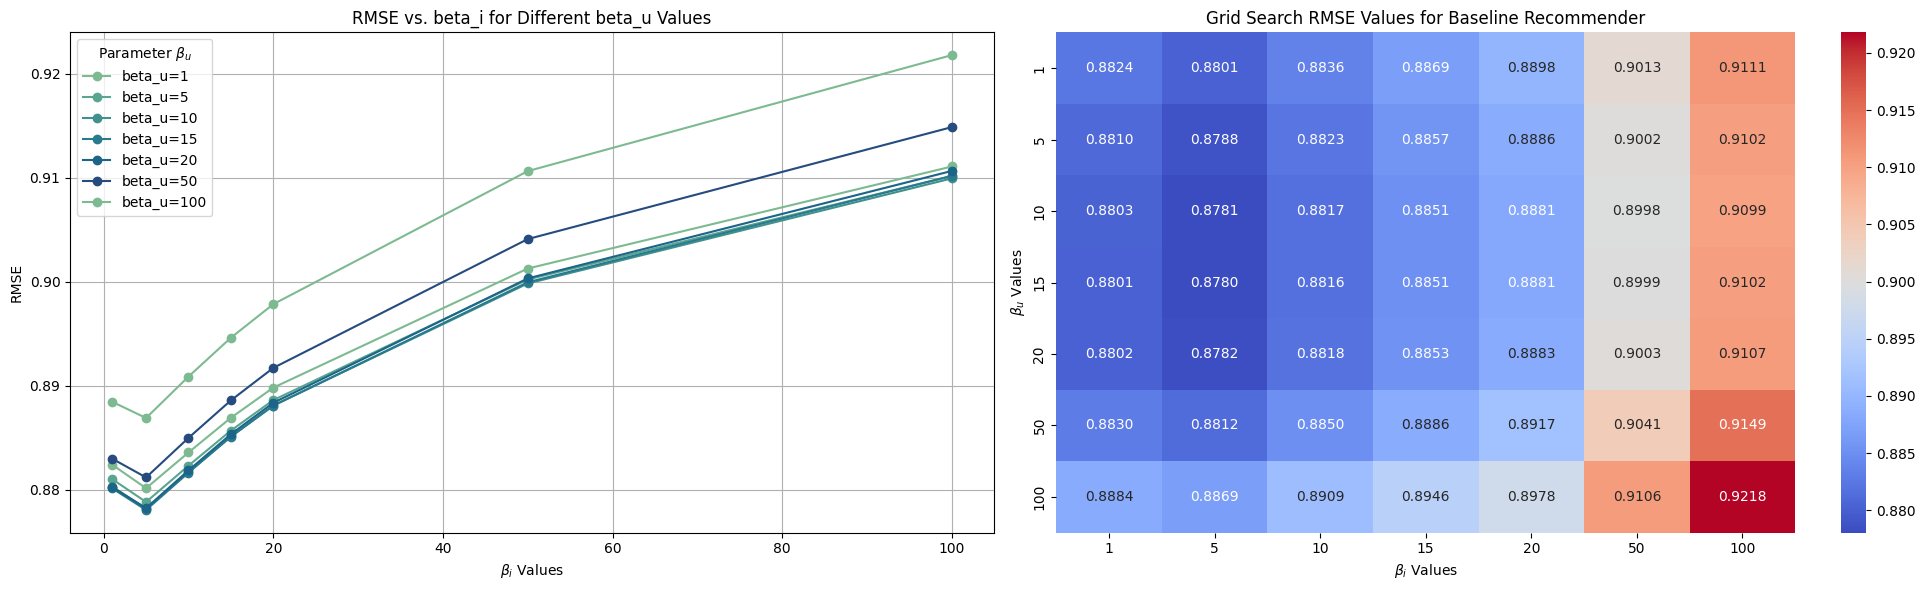

In [129]:
def plot_rmse_hyperparameters(beta_u_values, beta_i_values, results):
    rmses_matrix = np.zeros((len(beta_u_values), len(beta_i_values)))

    for params_string, metrics in results.items():
        params = eval(params_string)
        rmse = metrics[0]

        beta_u_idx = beta_u_values.index(params['beta_u'])
        beta_i_idx = beta_i_values.index(params['beta_i'])
        
        rmses_matrix[beta_u_idx, beta_i_idx] = rmse

    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    for index, beta_u in enumerate(beta_u_values):
        plt.plot(beta_i_values, rmses_matrix[index], label=f'beta_u={beta_u}', marker='o')
    
    plt.title('RMSE vs. beta_i for Different beta_u Values')
    plt.xlabel(r"$\beta_i$ Values")
    plt.ylabel('RMSE')
    plt.legend(title=r'Parameter $\beta_u$')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.heatmap(rmses_matrix, annot=True, fmt=".4f", xticklabels=beta_i_values, yticklabels=beta_u_values, cmap='coolwarm')
    plt.title('Grid Search RMSE Values for Baseline Recommender')
    plt.xlabel(r"$\beta_i$ Values")
    plt.ylabel(r"$\beta_u$ Values")

    plt.tight_layout()
    plt.show()

plot_rmse_hyperparameters(param_grid['beta_u'], param_grid['beta_i'], results)

Shapewise both parameters $\beta_u$ and $\beta_i$ show the same trend. A clear crease at around $\beta_i=$

In [131]:
def output_best_metrics(results, best_params, best_rmse):
    best_params_str = str(best_params)
    best_metrics = results[best_params_str]
    
    print("--- Grid Search Results ---")
    print(f"Best Parameters: {best_params}")
    print(f"Best RMSE: {best_rmse:.4f}")    
    print(f"Best Average MAE: {best_metrics[3]:.4f}")
    print(f"Best Average Precision@K: {best_metrics[1]:.4f}")
    print(f"Best Average Recall@K: {best_metrics[2]:.4f}")

        
output_best_metrics(results, best_params, best_rmse)

--- Grid Search Results ---
Best Parameters: {'beta_u': 15, 'beta_i': 5}
Best RMSE: 0.8780
Best Average MAE: 0.7054
Best Average Precision@K: 0.6315
Best Average Recall@K: 0.6736


In [134]:
result_store.add_result(recommender_name='BaselineRecommender', 
                        rmse=best_rmse,
                        mae=None,
                        best_parameters=best_params, 
                        precision_at_k=None,
                        recall_at_k=None, 
                        exercise=4, 
                        results=results)

✅ Result added!


### Exercise 5 - Collaborative filtering item based and user based (10 points)
In this exersise we will build several different collaborative-filtering RS based on nearest neighbour technique, both in terms of item and user. 

Implement:
1. a RS based on the $K$ most similar items (K nearest neighbours). Similarity shall be calculated based on *cosine similarity*. 
2. a RS based on the $K$ most similar items (K nearest neighbours). Similarity shall be calculated based on *Pearson Correlation Coefficienct*. 
3. a RS based on the $K$ most similar users (K nearest neighbours). Similarity shall be calculated based on *cosine similarity*. 
4. a RS based on the $K$ most similar users (K nearest neighbours). Similarity shall be calculated based on *Pearson Correlation Coefficienct*. 

Each should have a default $K$ of 30.

Describe the two similarity metrics.


#### Defining a Base
In order to streamline the process of creating these different recommenders, I define a Base-Class `RecommenderSystemBase` that holds the structure and the base functions for the following recommenders.

The `RecommenderSystemBase` holds the following functions:
- `_cosine_similarity`: This function calculates the cosine similarity for the entire matrix (vectorized) along axis 1.
- `_pearson_correlation`: This function calculates the pearson correlation for the entire matrix (vectorized) along axis 1.
- `_find_nearest_neighbors`: This function returns the `K` highest correlating indices of the similarities that were defined by either `_cosine_similarity` or `_pearson_correlation`.

In [135]:
class RecommenderSystemBase:
    def __init__(self, K=30, similarity='cosine'):
        self.K = K
        self.similarities = None
        self.ratings_matrix = None
        self.similarity = similarity

    def _cosine_similarity(self, matrix):
        norm = np.linalg.norm(matrix, axis=1, keepdims=True)
        norm_matrix = matrix / norm
        similarity = np.dot(norm_matrix, norm_matrix.T)
        np.fill_diagonal(similarity, 0)
        return similarity

    def _pearson_correlation(self, matrix):
        mean_centered = matrix - np.mean(matrix, axis=1, keepdims=True)
        corr_matrix = np.corrcoef(mean_centered)
        np.fill_diagonal(corr_matrix, 0)
        return corr_matrix

    def _find_nearest_neighbors(self, idx, exclude_idx=True):
        sorted_indices = np.argsort(-self.similarities[idx])[:self.K+1]
        if exclude_idx:
            sorted_indices = sorted_indices[sorted_indices != idx]
        return sorted_indices[:self.K]

### Item-Based Collaborative Filtering
The Item-Based Collaborative Filtering System basically implements a way to recommend items to users based on the rating matrix's rating patterns of items. This means if some item a and item b have the same users like and dislike it (in the scale of 0-5), then they are considered similar items. The estimator in this case is defined as follows:
$$p_{u,i}=\frac{\sum_{j\in S} s(i,j)(r_{u,j}-b_{u,j})}{\sum_{j\in S} |s(i,j)|}+b_{u,i}$$
Where...
- $u$ is a user
- $i$ is an item
- $s$ is a similarity measuring function (either *pearson correlation* or *cosine similarity* in our case)
- $S$ is a neighborhood of similar items
- $j$ is an item in neighborhood $S$
- $r$ is a rating in the user rating matrix
- $b$ is a predicted rating from a baseline estimator (in our case the `BaselineRecommender`)

This estimator essentially predicts a rating by taking the baseline predictor and adding (or subtracting) an offset based on how similar items in the neighborhood $S$ of the to-be-rated item have been rated. If the baseline predictor's ratings in the neighborhood is higher than an actual ratings in the neighborhood the summand will fall out negative, thus being subtracted from the baseline and vice-versa. The fraction part is important as it adds context of how close each neighbor is - Thus, weighing in the importance of each neighbor; Close neighbors have more weight than neighbors further away.

A main disadvantage of Item-Based CF approaches is that they suffer from scalability. Every item's vector grows steadily if new users get added to the environment. The same phenomenon can also be observed for User-Based Collaborative Filtering systems but usually items usually grow at a slower rate than users in dynamic systems - Luckily though, in our example of the MovieLens dataset the number of samples stays the same for both the users and the items. 

In [136]:
class ItemCF(RecommenderSystemBase):
    def __init__(self, K=30, baseline_recommender=None, similarity='cosine'):
        super().__init__(K)
        self.baseline_recommender = baseline_recommender or BaselineRecommender()
        self.similarity = similarity

    def fit(self, ratings_matrix):
        self.ratings_matrix = ratings_matrix
        self.baseline_recommender.fit(ratings_matrix)
        filled_matrix = np.nan_to_num(ratings_matrix, nan=0)
        if self.similarity == 'cosine':
            self.similarities = self._cosine_similarity(filled_matrix.T)
        else:
            self.similarities = self._pearson_correlation(filled_matrix.T)

    def predict(self, user_id, item_id):
        if not np.isnan(self.ratings_matrix[user_id, item_id]):
            return self.ratings_matrix[user_id, item_id]

        items = np.where(~np.isnan(self.ratings_matrix[user_id]))[0]
        num = denom = 0
        baseline_ui = self.baseline_recommender.predict(user_id, item_id)

        for j in items:
            baseline_uj = self.baseline_recommender.predict(user_id, j)
            rating_diff = self.ratings_matrix[user_id, j] - baseline_uj
            sim = self.similarities[item_id, j]
            num += sim * rating_diff
            denom += abs(sim)

        if denom == 0:
            return baseline_ui

        predicted_rating = num / denom + baseline_ui
        return predicted_rating

    def predict_multiple(self, user_ids, item_ids):
        predictions = []
        for user_id, item_id in zip(user_ids, item_ids):
            prediction = self.predict(user_id, item_id)
            predictions.append(prediction)
        return predictions
    
    def recommend(self, user_id):
        recommendations = []
        for item_id in range(self.ratings_matrix.shape[1]):
            if np.isnan(self.ratings_matrix[user_id, item_id]):
                predicted_rating = self.predict(user_id, item_id)
                recommendations.append((item_id, predicted_rating))
        recommendations.sort(key=lambda x: x[1], reverse=True)
        return recommendations[:self.K]

In [137]:
for sim in ['cosine', 'pearson']:
    print(f'💡 Currently Checking Similarity: {sim}\n')
    item_cf = ItemCF(K=30, similarity=sim)
    item_cf.fit(user_item_matrix.values)

    plausibility_check(item_cf, n_recs=5, n_users=3)

💡 Currently Checking Similarity: cosine

--- ⚙️ ItemCF Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,Stanley & Iris (1990),5.659238
1,Tokyo-Ga (1985),5.551028
2,Reality (2014),5.256245
3,Kevin Hart: Laugh at My Pain (2011),5.244152
4,How to Make Love to a Woman (2010),5.238136


⭐ User 80 Recommendations


,title,predicted_rating
0,"Invisible Man, The (1933)",5.199266
1,"Killer Shrews, The (1959)",5.199266
2,Runaway (1984),5.199266
3,"Collector, The (La collectionneuse) (1967)",5.161259
4,Boys Life (1995),5.125108


⭐ User 545 Recommendations


,title,predicted_rating
0,Vampires (1998),4.865210
1,Pulp Fiction (1994),4.852768
2,This Is My Father (1998),4.810381
3,Earthquake (1974),4.736628
4,"Freshman, The (1990)",4.645466



💡 Currently Checking Similarity: pearson

--- ⚙️ ItemCF Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,Vampires (1998),4.765840
1,Pulp Fiction (1994),4.691873
2,Private Benjamin (1980),4.677283
3,Green Room (2015),4.584107
4,Aliens (1986),4.560396


⭐ User 80 Recommendations


,title,predicted_rating
0,"Shawshank Redemption, The (1994)",4.976520
1,Star Wars: Episode V - The Empire Strikes Back...,4.878240
2,"10,000 BC (2008)",4.877237
3,12 Angry Men (1957),4.874688
4,Cheech and Chong's Up in Smoke (1978),4.859857


⭐ User 545 Recommendations


,title,predicted_rating
0,Private Benjamin (1980),4.942268
1,Vampires (1998),4.925813
2,Pulp Fiction (1994),4.919843
3,Trainspotting (1996),4.810224
4,Dr. Strangelove or: How I Learned to Stop Worr...,4.809688


The plausiblity check for the Item-Item Collaborative Filtering System showed some interesting results:
- The systems don't recommend the same movies
- The movies that get recommended have different neighborhoods of predicted ratings; The cosine-based Item-Item CF tends to give higher ratings 

#### User-Based Collaborative Filtering
The User-Based Collaborative Filtering approach, like the Item-Based CF, also makes use of the vector space being spanned by the user rating matrix in a k-NN manner. The principle is quite straightforward: The system should find a neighborhood of users that have previously rated the same items similarily as the user for which we want to recommend unwatched movies. The predicted rating of an unwatched item in the context of User-Based CF can be calculated as follows:
$$p_{u,i}=\bar{r}_u+\sigma_u\frac{\sum_{u'\in N}s(u,u')\frac{(r_{u',i}-\bar{r}_{u'})}{\sigma_{u'}}}{\sum_{u'\in N}|s(u,u')|}$$
Where...
- $\bar{r}_u$ and $\bar{r}_{u'}$ are the average ratings for user $u$ and user $u'$ in the neighborhood $N$
- $\sigma_u$ and $\sigma_{u'}$ are the standard deviations for the ratings of user $u$ and user $u'$ which is in the neighborhood $N$

This estimator takes the user's average rating that he has already given to other items and again adds or subtracts an offset influenced by his neighbors in $N$. This time a Z-Score of the neighborhoods distribution gets calculated ($\frac{r_{u',i}-\bar{r}_{u'}}{\sigma_{u'}}$) which then gets weighed in by the neighboring users. This Z-Score is then converted back into the common rating distribution by multiplying the entire fraction of the weighted sums with the users standard deviation of ratings.

In [138]:
class UserCF(RecommenderSystemBase):
    def __init__(self, K=30, similarity='cosine'):
        super().__init__(K)
        self.similarity = similarity
    
    def fit(self, ratings_matrix):
        self.ratings_matrix = ratings_matrix
        filled_matrix = np.nan_to_num(ratings_matrix, nan=0)
        if self.similarity == 'cosine':
            self.similarities = self._cosine_similarity(filled_matrix)
        else:
            self.similarities = self._pearson_correlation(filled_matrix)

    def predict(self, user_id, item_id):
        if not np.isnan(self.ratings_matrix[user_id, item_id]):
            return self.ratings_matrix[user_id, item_id]

        neighbors = self._find_nearest_neighbors(user_id)
        num = denom = 0
        user_mean = np.nanmean(self.ratings_matrix[user_id])
        user_std = np.nanstd(self.ratings_matrix[user_id])

        if user_std == 0:
            user_std = 1

        for neighbor in neighbors:
            if not np.isnan(self.ratings_matrix[neighbor, item_id]):
                neighbor_mean = np.nanmean(self.ratings_matrix[neighbor])
                neighbor_std = np.nanstd(self.ratings_matrix[neighbor])

                if neighbor_std == 0:
                    continue

                rating_diff = (self.ratings_matrix[neighbor, item_id] - neighbor_mean) / neighbor_std
                sim = self.similarities[user_id, neighbor]
                num += sim * rating_diff
                denom += abs(sim)

        if denom == 0:
            return user_mean

        predicted_rating = user_mean + (user_std * num / denom)
        return predicted_rating

    def predict_multiple(self, user_ids, item_ids):
        predictions = []
        for user_id, item_id in zip(user_ids, item_ids):
            prediction = self.predict(user_id, item_id)
            predictions.append(prediction)
        return predictions
    
    def recommend(self, user_id):
        recommendations = []
        for item_id in range(self.ratings_matrix.shape[1]):
            if np.isnan(self.ratings_matrix[user_id, item_id]):
                predicted_rating = self.predict(user_id, item_id)
                recommendations.append((item_id, predicted_rating))
        recommendations.sort(key=lambda x: x[1], reverse=True)
        return recommendations[:self.K]

In [139]:
for sim in ['cosine', 'pearson']:
    print(f'💡 Currently Checking Similarity: {sim}\n')
    user_cf = UserCF(K=30, similarity=sim)
    user_cf.fit(user_item_matrix.values)

    plausibility_check(user_cf, n_recs=5, n_users=3)

💡 Currently Checking Similarity: cosine

--- ⚙️ UserCF Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,Citizen Kane (1941),5.160920
1,Multiplicity (1996),4.962082
2,"Truth About Cats & Dogs, The (1996)",4.818625
3,"Long Kiss Goodnight, The (1996)",4.818625
4,Reality Bites (1994),4.711335


⭐ User 80 Recommendations


,title,predicted_rating
0,"Wizard of Oz, The (1939)",5.161503
1,Married to the Mob (1988),5.161503
2,Friday the 13th (2009),5.161503
3,Solaris (Solyaris) (1972),5.113709
4,Laws of Attraction (2004),5.113709


⭐ User 545 Recommendations


,title,predicted_rating
0,Phantoms (1998),5.596478
1,We're Back! A Dinosaur's Story (1993),5.580646
2,"Closer You Get, The (2000)",5.102966
3,Charlie Bartlett (2007),5.069011
4,Behind the Mask: The Rise of Leslie Vernon (2006),5.069011



💡 Currently Checking Similarity: pearson

--- ⚙️ UserCF Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,Citizen Kane (1941),5.160920
1,Multiplicity (1996),4.961276
2,"Truth About Cats & Dogs, The (1996)",4.818625
3,"Long Kiss Goodnight, The (1996)",4.818625
4,Reality Bites (1994),4.711335


⭐ User 80 Recommendations


,title,predicted_rating
0,Kickin It Old Skool (2007),5.401996
1,Solaris (Solyaris) (1972),5.113709
2,Laws of Attraction (2004),5.113709
3,True Stories (1986),5.113709
4,Breakfast on Pluto (2005),5.113709


⭐ User 545 Recommendations


,title,predicted_rating
0,Phantoms (1998),5.596478
1,"Closer You Get, The (2000)",5.596478
2,Stalag 17 (1953),5.580646
3,We're Back! A Dinosaur's Story (1993),5.580646
4,Charlie Bartlett (2007),5.069011


The User-Based Collaborative Filtering system, in contrast to the Item-Based CF, shows very similar recommendations among the randomly selected users. Also the rating scale seems to be stable and in the same spectrum for both the cosine similarity neighborhood and the pearson correlation neighborhood.

#### The Similarities at Hand
For the exercise 5 we implemented the **Cosine Similarity** and **Pearson Correlation**. 
- **Pearson Correlation** is sensitive to the ratings scale used by different users (it considers the users' average ratings). It's ideal when the goal is to factor in user rating behavior (some users may generally rate higher or lower than others).
- **Cosine Similarity** treats the ratings as vectors in a space and measures the cosine of the angle between them. It's useful when the magnitude of the rating vectors matters more than their relative differences due to its focus on the angle between vectors:
    - Cosine Similarity measures the cosine of the angle between two vectors, making it sensitive to the direction (or pattern) of the vectors rather than their length. In the context of ratings: 
        - **Direction** reflects the pattern of user preferences across different items.
        - **Magnitude** reflects the user's tendency to rate more generously or more stringently.
    - This means that if two users consistently rate movies in the same pattern (e.g., rating one movie higher than another), they will have a high cosine similarity, regardless of the actual numerical values of their ratings.

**Mathematical Definition**:

- The **Pearson Correlation Coefficient** measures the linear correlation between two variables, ranging from `-1` (perfect negative correlation) to `+1` (perfect positive correlation). In collaborative filtering:
    - **Purpose**: It's used to measure the degree of linear relationship between two users' or items' ratings.
    - **Calculation**: Pearson correlation between users or items is calculated as: $\text{corr}(A,B)=\frac{\sum(r_{a,i}-\bar{r}_a)(r_{b,i}-\bar{r}_b)}{\sqrt{\sum(r_{a,i}-\bar{r}_a)^2\sum(r_{b,i}-\bar{r}_b)^2}}$ In essence, the Pearson correlation calculates the covariance between the two variables, divided by the product of their standard deviations (which normalizes the result between `-1` and `+1`). 

- **Cosine similarity** measures the cosine of the angle between two vectors. In the case of collaborative filtering:
    - **Purpose**: It evaluates the similarity between two users' or items' rating patterns, regardless of their average rating levels.
    - **Calculation**: Cosine similarity between users or items is calculated as: $\text{corr}(A,B)=\frac{\sum(r_{a,i} r_{b,i})}{\sqrt{\sum(r_{a,i}^2\sum(r_{b,i}^2))}}$ So this metric is essentially the dot product between the vectors in the utility matrix (transposed for item cosine similarity) but they get normalized by their length.



### Exercise 6 - Optimize hyperparameter $K$ (6 points)
Optimize the hyperparameter $K$ for all RS from the prior exercise optimizing for minimal RMSE. 
For each RS plot RMSE, Precision@N and Recall@N as a function of $K$. 

Compare the results of these four RS on the 3 example users. Do the results match your expectation? Describe.

#### Optimization of Collaborative Filtering Systems
This function steers the Grid Search for both the User-Based and Item-Based Collaborative Filtering Systems.

The implemented similarity metrics (Pearson Correlation and Cosine Similarity) are **treated as hyperparameters** together with the number of neighbors `K`, so the parameter grid will consist of a range of neighbors and the two similarity measures.

In [141]:
def optimize_cf_recommenders(recommenders: list=[], param_grid: dict={}):
    optimization_results = {}
    
    for recommender in recommenders:
        print(f'--- Optimizing {recommender.__name__} ---')
        best_params, best_rmse, individual_results = grid_search_cv(user_item_matrix.values, recommender, param_grid, parallel=True)
        
        print(f"Best Parameters: {best_params}")
        print(f"Best RMSE: {best_rmse}")
        print(f"Best MAE: {individual_results[str(best_params)][3]}\n")
        
        optimization_results[recommender.__name__] = {
            'best_params': best_params,
            'best_rmse': best_rmse,
            'results': individual_results
        }
        
    return optimization_results

param_grid = { 
              'K': [1, 5, 30, 50],
              'similarity': ['cosine', 'pearson']
             }

cf_results = optimize_cf_recommenders(recommenders=[
                                    UserCF,
                                    ItemCF
                                    ],
                                   param_grid=param_grid)

--- Optimizing UserCF ---
Best Parameters: {'K': 50, 'similarity': 'cosine'}
Best RMSE: 0.9074767419642666
Best MAE: 0.7209657746364277

--- Optimizing ItemCF ---
Best Parameters: {'K': 1, 'similarity': 'pearson'}
Best RMSE: 0.9205171731188173
Best MAE: 0.7377962810507632



The User-User Collaborative Filtering System seems to reach a slightly lower RMSE with `50` neighboring users and the Cosine Similarity measure for the determination of the neighborhood. The Item-Based CF on contrast seems to benefit from a low number of neighbors (in this case `1`) together with the Pearson Correlation as a similarity measure. An issue that can come up with this low amount of neighbors is that the estimator might overfit - It just takes the nearest neighbor as its only influence. 

An explanation for the `ItemCF`' could be that using Pearson correlation in k-NN environments tends to perform better with fewer neighbors because it emphasizes relationships where the deviations from the mean rating are consistently similar. The high number of `K` for the `UserCF` could be since cosine similarity ignores the magnitude differences, having more neighbors can help average out individual biases in rating scales or tendencies.

Both outcomes show widely different results, both at one end of the parameter grid. In a real world scenario it definitely would make sense to explore a larger grid of possible parameters.

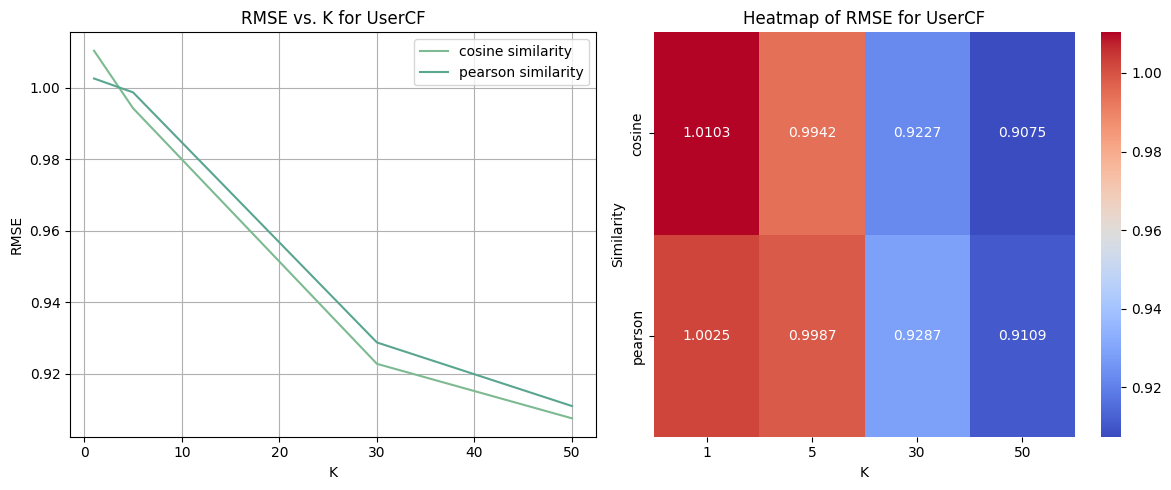

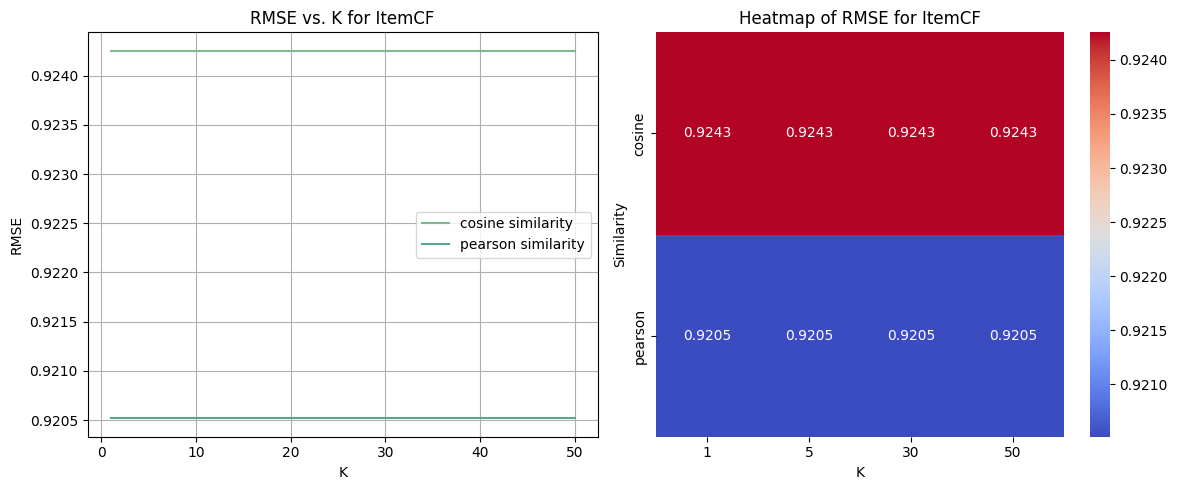

In [142]:
import ast

def plot_cf_results(cf_results):
    for cf_name, results in cf_results.items():
        individual_results = results['results']

        K_values = []
        similarity_types = []
        data = []

        for key, value in individual_results.items():
            params = ast.literal_eval(key)
            rmse = value[0]
            
            K_values.append(params['K'])
            similarity_types.append(params['similarity'])
            data.append((params['K'], params['similarity'], rmse))

        K_values = np.unique(K_values)
        similarity_types = np.unique(similarity_types)
        rmse_values = np.zeros((len(similarity_types), len(K_values)))
        
        for i, sim in enumerate(similarity_types):
            for j, k in enumerate(K_values):
                rmse = [d[2] for d in data if d[0] == k and d[1] == sim]
                if rmse:
                    rmse_values[i, j] = rmse[0]

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

        for i, sim in enumerate(similarity_types):
            axes[0].plot(K_values, rmse_values[i, :], label=f'{sim} similarity', zorder=2)
        axes[0].set_title(f"RMSE vs. K for {cf_name}")
        axes[0].set_xlabel('K')
        axes[0].set_ylabel('RMSE')
        axes[0].grid(True, zorder=0)
        axes[0].legend()
        
        sns.heatmap(rmse_values, ax=axes[1], annot=True, fmt=".4f", xticklabels=K_values, yticklabels=similarity_types, cmap="coolwarm")
        axes[1].set_title(f"Heatmap of RMSE for {cf_name}")
        axes[1].set_xlabel('K')
        axes[1].set_ylabel('Similarity')

        plt.tight_layout()
        plt.show()

plot_cf_results(cf_results)

The `UserCF` shows exactly through the parameters how it profits from a higher number of neighbors `K` through all the tried parameters.

In [144]:
for cf in cf_results:
    result_store.add_result(recommender_name=cf,
                            rmse=cf_results[cf]["best_rmse"],
                            mae=None,
                            best_parameters=cf_results[cf]["best_params"],
                            precision_at_k=cf_results[cf]["results"][str(cf_results[cf]["best_params"])][1],
                            recall_at_k=cf_results[cf]["results"][str(cf_results[cf]["best_params"])][2],
                            exercise=6,
                            results=cf_results[cf]['results'])

✅ Result added!
✅ Result added!


### Excercise 7 - Model-based RS: SVD (6 points)
In this exercise we will use the unsupervised method *singular value decomposition (SVD)* from the python package *surprise* (https://surpriselib.com, documentation https://surprise.readthedocs.io/en/stable/matrix_factorization.html) or the R package *recommenderlab*. SVD can compress much of the information of a matrix in few components.  

Run the SVD RS and show the results on the three example users from exercise 2. Explain how this algorithm works.

Note: A very good general introduction to SVD is this youtube video series starting with https://www.youtube.com/watch?v=gXbThCXjZFM&t=337s . See *Collaborative filtering recommender systems* by Ekstrand et al. *Mining of massive datasets* by Leskovec, Kapitel 11 (2020) and ,*Recommender systems: The textbook*, by Aggarwal, chapter 3

#### Recommending based on Singular Value Decomposition
The following class represents a wrapper around the surprise `SVD` class. I wrote this wrapper so that I could adapt it to my helper functions like `grid_search_cv` and `plausibility_check` but it does not interfere with surprise's `SVD` functionality.

In [145]:
import pandas as pd
from surprise import SVD, Dataset, Reader

class SVDRecommender:
    def __init__(self, n_factors=50, random_state=1337, rating_scale=(0, 5), top_n=20):
        self.n_factors = n_factors
        self.random_state = random_state
        self.rating_scale = rating_scale
        self.svd = SVD(n_factors=self.n_factors, random_state=self.random_state)
        self.reader = Reader(rating_scale=self.rating_scale)
        self.user_item_matrix = None
        self.top_n = top_n

    def fit(self, user_item_matrix):
        if not isinstance(user_item_matrix, np.ndarray):
            raise ValueError("user_item_matrix must be a numpy array")

        self.user_item_matrix = user_item_matrix
        
        data = pd.DataFrame(user_item_matrix)
        data = data.stack().reset_index()
        data = data.rename(columns={'level_0': 'userId', 'level_1': 'itemId', 0: 'rating'})
        data = data.dropna(subset=['rating'])
        
        surprise_data = Dataset.load_from_df(data[['userId', 'itemId', 'rating']], self.reader)
        trainset = surprise_data.build_full_trainset()
        self.svd.fit(trainset)

    def predict(self, user, item):
        if not np.isnan(self.user_item_matrix[user, item]):
            return self.user_item_matrix[user, item]

        return self.svd.predict(user, item).est
    
    def recommend(self, user_id):
        recommendations = []
        for item_id in range(self.user_item_matrix.shape[1]):
            if np.isnan(self.user_item_matrix[user_id, item_id]):
                predicted_rating = self.predict(user_id, item_id)
                recommendations.append((item_id, predicted_rating))
        recommendations.sort(key=lambda x: x[1], reverse=True)
        return recommendations[:self.top_n]

In [146]:
svd = SVDRecommender(n_factors=50, random_state=1337)
svd.fit(user_item_matrix.values)

In [197]:
plausibility_check(svd, n_recs=5, n_users=3)

--- ⚙️ SVDRecommender Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,Star Wars: Episode V - The Empire Strikes Back...,4.355686
1,Diva (1981),4.291796
2,Spacehunter: Adventures in the Forbidden Zone ...,4.277184
3,Sydney (Hard Eight) (1996),4.262851
4,Bad Lieutenant (1992),4.261175


⭐ User 80 Recommendations


,title,predicted_rating
0,Withnail & I (1987),4.941436
1,"Arrival, The (1996)",4.909126
2,"Godfather: Part II, The (1974)",4.886832
3,Top Gun (1986),4.885507
4,Cheech and Chong's Up in Smoke (1978),4.880174


⭐ User 545 Recommendations


,title,predicted_rating
0,Kiss of Death (1995),4.509304
1,"Mod Squad, The (1999)",4.497779
2,One Flew Over the Cuckoo's Nest (1975),4.496306
3,"Pyromaniac's Love Story, A (1995)",4.461078
4,"Santa Clause, The (1994)",4.415715


#### How Singular Value Decomposition works
Singular Value Decomposition is a very useful **Matrix Factorization** technique. It essentially allows to *decompose* any matrix into 2 lower rank matrices ($U$ and $V^T$) which are both orthogonal and a diagnoal stretching matrix $\Sigma$. So a matrix $A$ can be decomposed as $A=U\Sigma V^T$. 

---
**Computing $V$**

To compute $V$ and therefore $V^T$ we need to find the eigenvectors and eigenvalues of $A^TA$, the eigenvectors then form the columns of $V$. The columnvectors (eigenvectors of $A^TA$) are ordered after their magnitude of squares of the eigenvectors $\lambda$. 

**Computing $U$**

To compute $U$ we need to find the eigenvectors and eigenvalues of $AA^T$ and similarly order them together according to their eigenvalues' $\lambda_n$ magnitudes.

---

The diagonal matrix $\Sigma$ then consists of the square roots of the non-zero eigenvalues of $A^TA$ and $AA^T$ (both matrices should yield the same eigenvalues) and in $\Sigma$ they're also ordered after their magnitude.

The number of factors (`n_factors`) in this decomposition describes how many column vectors in $U$ and $V^T$ and eigenvalues in $\Sigma$ we want to keep to reconstruct $A$. The components (eigenvectors and eigenvalues) will hold information on the decomposed matrix. The eigenvectors and eigenvalues with the most important information is held by the highest eigenvalues in $\Sigma$. Those capture the largest directions of variance of the data in the matrix $A$ and the further down we go the less information is added by the following eigenvalues in the diagonal matrix. This theory is also applied in *PCA* where we use these exact features to project data onto these "axes of most variance" (principal components).

So in the realm of recommenders, SVD finds its appliance by decomposing the User Rating matrix. But there is one big problem: **SVD does not work for sparse matrices** with a lot of undefined values. In Recommender Systems the user-item rating matrix gets decomposed into $\hat{r}_{u,i}=q_i^Tp_u$. Both these two vectors $q_i\in\mathbb{R}^f$ and $p_u\in\mathbb{R}^f$ represent vectors of factors inferred from the user-item rating matrix. Each item is associated with $q_i$ and each user with $p_u$. For example, the elements of the vector $p_u$ tell us how much interest a user has to the corresponding element in $q_i$ and vice versa. Thus, when multiplied together ($q_i^Tp_u$) yielding the interaction matrix. To decompose the rating matrix into those two factor-vectors $q$ and $p$, the system minimizes the squared error in the known ratings with either *stochastic gradient descent* or *alternating least squares*: $$\min_{q^*,p^*}\sum_{(u,i)\in\kappa}(r_{u,i}-q_i^Tp_u)^2+\lambda(||q_i||^2+||p_u||^2)$$
The second term adds a squared $L_2$-Norm regularization with strength $\lambda$.

### Exercise 8 - Optimize hyperparameter $k$ or `n_factors` (4 points)
Optimize the hyperparameter, representing the number of greatest SVD components used for the truncated reconstruction of the user item matrix, to minimize RMSE.
Plot RMSE, Precision@N and Recall@N as a function of this hyperparameter. Finally output all performance metrics from exercise 3 for the found value.

#### Optimization of the SVD Recommender

In [147]:
param_grid = {
    'n_factors': [1, 2, 3, 5, 10, 50, 100, 150, 200, 250, 300, 350]
    }

best_params, best_rmse, results = grid_search_cv(user_item_matrix.values, SVDRecommender, param_grid)

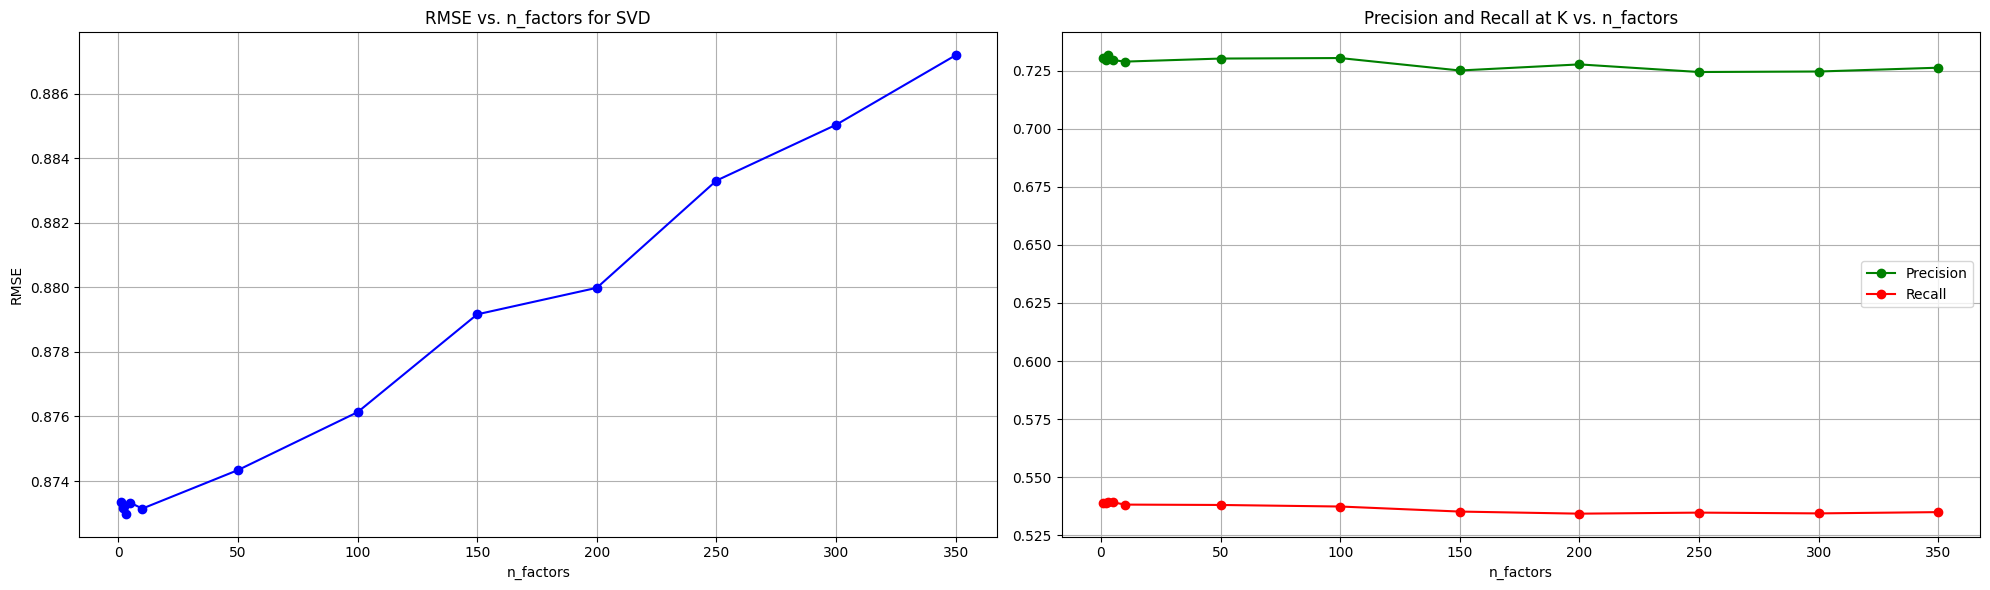

In [148]:
n_factors = []
rmse_values = []
precision_values = []
recall_values = []

for key, metrics in results.items():
    params = ast.literal_eval(key)
    n_factors.append(params['n_factors'])
    rmse_values.append(metrics[0])
    precision_values.append(metrics[1])
    recall_values.append(metrics[2])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(n_factors, rmse_values, marker='o', color='blue')
ax1.set_title('RMSE vs. n_factors for SVD')
ax1.set_xlabel('n_factors')
ax1.set_ylabel('RMSE')
ax1.grid(True)

ax2.plot(n_factors, precision_values, marker='o', label='Precision', color='green')
ax2.plot(n_factors, recall_values, marker='o', label='Recall', color='red')
ax2.set_title('Precision and Recall at K vs. n_factors')
ax2.set_xlabel('n_factors')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

The RMSE vs. n_factors Plot nicely shows how we already start at a fairly low RMSE with just one SVD component but can get an even lower RMSE up until `n_factors=3`. After that, adding more components seems to add too much noise, therefore an increas in RMSE can be observed.

As for the Precision and Recall at K we can't see much change throughout the `n_factors`. This is because these metrics largely depend on the `mask_ratio` of the KFold. A positive thing can be observed though; The Recall@K and Precision@K don't get worse and stay stable throughout the parameter grid.

In [149]:
output_best_metrics(results, best_params, best_rmse)

--- Grid Search Results ---
Best Parameters: {'n_factors': 3}
Best RMSE: 0.8730
Best Average MAE: 0.6980
Best Average Precision@K: 0.7316
Best Average Recall@K: 0.5394


In [150]:
result_store.add_result(recommender_name='SVDRecommender',
                        rmse=best_rmse,
                        mae=None,
                        best_parameters=best_params,
                        precision_at_k=None,
                        recall_at_k=None,
                        exercise=8,
                        results=results)

✅ Result added!


### Exercise 9 - Everything goes (30 points)
In this exercise you can explore different methods of RS. You are not limited what methods you apply. You can try to improve the methods from the earlier exercises by adjusting them or generating ensemble or hybrid RS. Also you can train deep neural networks, use NLP methods, use the available links to imdb available in the dataset to further enrich the dataset or find an obscure method by someone else on Github. However document what your inspirations and sources are and your process. Important: If you use the work of someone else you must be able to explain the method conceptually. 
Output the performance metrics of exercise 3.

**Build and optimize at least three different methods.**

#### Co-Clustering Recommender

In [162]:
from surprise import CoClustering

class CoClusteringRecommender:
    def __init__(self, n_cltr_u=3, n_cltr_i=3, n_epochs=20, random_state=None, rating_scale=(0, 5), top_n=20, verbose=False):
        self.n_cltr_u = n_cltr_u
        self.n_cltr_i = n_cltr_i
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.verbose = verbose
        self.rating_scale = rating_scale
        self.top_n = top_n

        self.co_clustering = CoClustering(n_cltr_u=self.n_cltr_u, n_cltr_i=self.n_cltr_i, n_epochs=self.n_epochs,
                                          random_state=self.random_state, verbose=self.verbose)
        
        self.reader = Reader(rating_scale=self.rating_scale)
        self.user_item_matrix = None

    def fit(self, user_item_matrix):
        if not isinstance(user_item_matrix, np.ndarray):
            raise ValueError("user_item_matrix must be a numpy array")

        self.user_item_matrix = user_item_matrix

        data = pd.DataFrame(user_item_matrix)
        data = data.stack().reset_index()
        data = data.rename(columns={'level_0': 'userId', 'level_1': 'itemId', 0: 'rating'})
        data = data.dropna(subset=['rating'])

        surprise_data = Dataset.load_from_df(data[['userId', 'itemId', 'rating']], self.reader)
        trainset = surprise_data.build_full_trainset()
        self.co_clustering.fit(trainset)

    def predict(self, user, item):
        if not np.isnan(self.user_item_matrix[user, item]):
            return self.user_item_matrix[user, item]

        return self.co_clustering.predict(user, item).est

    def recommend(self, user_id):
        recommendations = []
        for item_id in range(self.user_item_matrix.shape[1]):
            if np.isnan(self.user_item_matrix[user_id, item_id]):
                predicted_rating = self.predict(user_id, item_id)
                recommendations.append((item_id, predicted_rating))
        recommendations.sort(key=lambda x: x[1], reverse=True)
        return recommendations[:self.top_n]

In [159]:
param_grid = {
    'n_cltr_u': [3, 4, 5, 6],
    'n_cltr_i': [3, 4, 5, 6],
    'n_epochs': [10, 20, 30],
}

best_params, best_rmse, results = grid_search_cv(user_item_matrix.values, CoClusteringRecommender, param_grid)

In [160]:
output_best_metrics(results, best_params, best_rmse)

--- Grid Search Results ---
Best Parameters: {'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 20}
Best RMSE: 0.9432
Best Average MAE: 0.7413
Best Average Precision@K: 0.7153
Best Average Recall@K: 0.5340


In [166]:
cc = CoClusteringRecommender(n_cltr_u=3, n_cltr_i=3, n_epochs=20, random_state=1337)
cc.fit(user_item_matrix.values)

plausibility_check(cc, n_recs=5, n_users=3, random_seed=42)

--- ⚙️ CoClusteringRecommender Plausibility Check ---

⭐ User 81 Recommendations


,title,predicted_rating
0,Ed (1996),4.585641
1,Land and Freedom (Tierra y libertad) (1995),4.585641
2,Wallace & Gromit: The Wrong Trousers (1993),4.585641
3,U Turn (1997),4.585641
4,Fandango (1985),4.585641


⭐ User 218 Recommendations


,title,predicted_rating
0,Mighty Aphrodite (1995),5
1,"Hate (Haine, La) (1995)",5
2,"Basketball Diaries, The (1995)",5
3,Hot Shots! Part Deux (1993),5
4,Executive Decision (1996),5


⭐ User 55 Recommendations


,title,predicted_rating
0,Mighty Aphrodite (1995),4.4644
1,"Hate (Haine, La) (1995)",4.4644
2,"Basketball Diaries, The (1995)",4.4644
3,Hot Shots! Part Deux (1993),4.4644
4,Executive Decision (1996),4.4644


### A Hybrid Approach
The Hybrid Recommender can combine multiple estimators into one. In my implementation I use both the Item-Based and User-Based Collaborative Filtering estimator and the `SVDRecommender`. There are various valid approaches to stick the underlying estimators in a hybrid system together, for example one could just output all `n` results that `n` recommenders yield or chain together restults of one recommender into another (this principle is called *cascading*). In this hybrid system though, I decided to implement a **Weighted Recommender** which gives each of the three estimators a weight. The prediction of each recommender then gets summed together within a weighted sum: $$p_{u,i}=\alpha_1 p_{u,i}^{(i)}+\dots+\alpha_n p_{u,i}^{(n)}$$
Where $\alpha_n$ is the weight of recommender $n$ and $p_{u,i}^{(n)}$ is the predicted rating of estimator $n$.

Both Collaborative Filtering estimators got added into the `HybridRecommender` with respect to their best performing similarity metric from exercise 5 and 6.

In [116]:
class HybridRecommender:
    def __init__(self, user_based_cf=None, item_based_cf=None, svd=None, weights=[0.333, 0.333, 0.333]):
        self.user_based_cf = user_based_cf() if user_based_cf is not None else UserCF(similarity='cosine')
        self.item_based_cf = item_based_cf() if item_based_cf is not None else ItemCF(similarity='pearson')
        self.svd = svd() if svd is not None else SVDRecommender()
        self.weights = weights

    def fit(self, ratings_matrix):
        self.user_based_cf.fit(ratings_matrix=ratings_matrix)
        self.item_based_cf.fit(ratings_matrix)
        self.svd.fit(ratings_matrix)

    def predict(self, user_id, item_id):
        user_based_prediction = self.user_based_cf.predict(user_id, item_id)
        item_based_prediction = self.item_based_cf.predict(user_id, item_id)
        svd_prediction = self.svd.predict(user_id, item_id)

        hybrid_prediction = sum([w * p for w, p in zip(self.weights, [user_based_prediction, item_based_prediction, svd_prediction])])
        
        return hybrid_prediction

    def predict_multiple(self, user_ids, item_ids):
        predictions = []
        for user_id, item_id in zip(user_ids, item_ids):
            prediction = self.predict(user_id, item_id)
            predictions.append(prediction)
        return predictions
    
    def recommend(self, user_id):
        hybrid_recs = []
        for item_id in range(self.user_based_cf.ratings_matrix.shape[1]):
            if np.isnan(self.user_based_cf.ratings_matrix[user_id, item_id]):
                predicted_rating = self.predict(user_id, item_id)
                hybrid_recs.append((item_id, predicted_rating))
        hybrid_recs.sort(key=lambda x: x[1], reverse=True)
        return hybrid_recs[:self.user_based_cf.K]

The parameter grid proposes four different ways of weighing the three estimators; One parameter combination will look at the performance if all estimators are weighed equally, the other three give one of the three the majority of the weight (50%). 

In [108]:
param_grid = {
    'weights': [
            [0.333, 0.333, 0.333], 
            [0.5, 0.25, 0.25], 
            [0.25, 0.5, 0.25], 
            [0.25, 0.25, 0.5]
        ]
    }

best_params, best_rmse, results = grid_search_cv(user_item_matrix.values, HybridRecommender, param_grid)

In [200]:
output_best_metrics(results, best_params, best_rmse)

--- Grid Search Results ---
Best Parameters: {'weights': [0.25, 0.25, 0.5]}
Best RMSE: 0.8582
Best Average Precision@K: 0.7113
Best Average Recall@K: 0.5382


The Hybrid Recommender hereby resulted in reaching the new best RMSE among all previous Recommenders. The Recall and Precision are also among the higher results compared to the previously explored approaches. The best weights-setting shows that the SVD should be weighted the highest. Since this hybrid recommender also overtook the simple `SVDRecommender`, this could mean that the implemented SVD approach benefits from the adjustment of some rather simple collaborative filtering techniques.

In [117]:
best_hybrid = HybridRecommender(weights=best_params['weights'])
best_hybrid.fit(user_item_matrix.values)

plausibility_check(best_hybrid, n_recs=5, n_users=3)

--- ⚙️ HybridRecommender Plausibility Check ---

⭐ User 559 Recommendations


,title,predicted_rating
0,Citizen Kane (1941),4.178519
1,Star Wars: Episode V - The Empire Strikes Back...,4.076582
2,"Savage Nights (Nuits fauves, Les) (1992)",4.025467
3,Braveheart (1995),4.019604
4,Multiplicity (1996),4.011379


⭐ User 80 Recommendations


,title,predicted_rating
0,Solaris (Solyaris) (1972),4.849469
1,Cheech and Chong's Up in Smoke (1978),4.792803
2,"Boot, Das (Boat, The) (1981)",4.786534
3,Star Wars: Episode V - The Empire Strikes Back...,4.778042
4,Withnail & I (1987),4.748900


⭐ User 545 Recommendations


,title,predicted_rating
0,Cheech and Chong's Up in Smoke (1978),4.309254
1,"Princess Bride, The (1987)",4.249259
2,Star Wars: Episode V - The Empire Strikes Back...,4.237274
3,Stalag 17 (1953),4.234537
4,Dead Poets Society (1989),4.225148


In [201]:
result_store.add_result(recommender_name='HybridRecommender',
                        rmse=best_rmse,
                        best_parameters=best_params,
                        precision_at_k=None,
                        recall_at_k=None,
                        exercise=9,
                        results=results)

✅ Result added!


#### Recommendation Movies using Temporal Behavior
I wasn't really satisfied yet with the `HybridRecommender`, it didn't really introduce much new principles for me when it comes to recommending. I then looked at the `ml-small-latest` dataset and noticed the timestamp variable we have for the ratings.

I am currently also enrolled in the *Natural Language Processing* and in the *Deep Learning* modules where I learned about **embedding models** and **Recurrent Neural Networks** - This is where the idea struck me to train an RNN that will take in a sequence of watched movies to predict which movie to watch next. To build such a sequence we could use the `timestamp` variable of the rating which roughly indicates when a movie was watched. This then helps us to sort the movies of a user into a temporal sequence.

So the task at hand is, unlike the preceding estimators, to predict a next movie in the sequence and not a number representing the rating of an item by a user.

**Step 1**: Preparing the movies for embedding

Since we only have movies with their genres and title at hand it is hard to come up with vector representations for each movie. A simple solution would be to use a TF-IDF-like sparse representation by scraping textual data from IMDb like tags or short descriptions. Scraping such data for all of the `9724` movies seems very resource intensive though, so I decided to go with a Skip-Gram-Model which just needs neighboring movies to train a vector space.

To aggregate such a neighborhood the following `generate_context_pairs` will generate a list of tuples of movieIds which follow each other in the user's watched history. The window (or number of neighbors) can be set with the variable `window_size`, for now, we will only look at the next single neighbors (`window_size=1`). 

In [195]:
df_movieratings.sort_values(by=['userId', 'timestamp'], inplace=True)

user_sequences = df_movieratings.groupby('userId')['movieId_seq'].apply(list).to_dict()

def generate_context_pairs(sequence, window_size=1):
    pairs = []
    for i in range(len(sequence)):
        target = sequence[i]
        context_indices = range(max(0, i-window_size), min(len(sequence), i+window_size+1))
        for j in context_indices:
            if i != j:
                context = sequence[j]
                pairs.append((target, context))
    return pairs

window_size = 3
all_pairs = []

for user_id, movies in user_sequences.items():
    user_pairs = generate_context_pairs(movies, window_size=window_size)
    all_pairs.extend(user_pairs)

df_pairs = pd.DataFrame(all_pairs, columns=['TargetMovieId', 'ContextMovieId'])

In [196]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU instead.")

Using GPU: NVIDIA GeForce RTX 3070 Ti Laptop GPU


**Step 2**: Splitting the data

To train the following SkipGramModel we need to split our dataset into a train and test split. This is done with an 80/20 split where 80% of the data is being learned and 20% can be used for testing.

In [197]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset

target_tensors = torch.tensor(df_pairs['TargetMovieId'].values, dtype=torch.long)
context_tensors = torch.tensor(df_pairs['ContextMovieId'].values, dtype=torch.long)

dataset = TensorDataset(target_tensors, context_tensors)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False, pin_memory=True)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 478156
Number of testing samples: 119540


**Step 3**: Defining the embedding model

This `SkipGramModel` is very simple, its input layer is a vector of the vocabulary size (number of movies in the dataset), which is a one hot encoded vector of the movie to be embedded. The embedding layer holds the trained embeddings as a simple lookup table. The output layer again is of the same dimension as the input layer since we want to predict the next following neighbors yielded by `generate_context_pairs`.

In [198]:
import torch.nn as nn
import torch.optim as optim

class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.output_layer = nn.Linear(embedding_dim, vocab_size)

    def forward(self, input_words):
        embedded = self.embeddings(input_words)
        out = self.output_layer(embedded)
        return out

**Step 4**: Training the embedding model

I decided for an embedding vector with 128 dimensions. This number of dimensions should be enough for the skip gram to capture patterns in the users watching history.

The training will write the "best model"'s parameters that reached the lowest test-loss into `models/best_embedding_model.pt`. 

In [200]:
vocab_size = df_pairs[['TargetMovieId', 'ContextMovieId']].max().max()  
embedding_dim = 64
learning_rate = 0.0001
epochs = 50

embedding_model = SkipGramModel(vocab_size=vocab_size + 1, embedding_dim=embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(embedding_model.parameters(), lr=learning_rate)

embedding_model = embedding_model.to(device)

train_losses = []
test_losses = []

best_epoch = None
best_loss = float('inf')
model_save_path = "best_embedding_model.pt"

for epoch in range(epochs):
    embedding_model.train()
    for batch in train_dataloader:
        target, context = batch
        target = target.to(device)
        context = context.to(device)

        optimizer.zero_grad()
        output = embedding_model(target)
        loss = criterion(output, context)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())

    embedding_model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch in test_dataloader:
            target, context = batch
            target = target.to(device)
            context = context.to(device)

            output = embedding_model(target)
            loss = criterion(output, context)
            test_loss += loss.item()

    test_loss /= len(test_dataloader)
    test_losses.append(test_loss)
    
    if test_loss < best_loss:
        best_loss = test_loss
        best_epoch = epoch + 1
        torch.save(embedding_model.state_dict(), f'models/{model_save_path}')
        print(f'New best model found in Epoch {best_epoch}. Model was saved ✅')

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]}, Test Loss: {test_loss}")


New best model found in Epoch 1. Model was saved ✅
Epoch 1/50, Train Loss: 9.210714340209961, Test Loss: 9.20915914653966
New best model found in Epoch 2. Model was saved ✅
Epoch 2/50, Train Loss: 9.107810020446777, Test Loss: 9.112974732539893
New best model found in Epoch 3. Model was saved ✅
Epoch 3/50, Train Loss: 8.96626091003418, Test Loss: 9.018189195391964
New best model found in Epoch 4. Model was saved ✅
Epoch 4/50, Train Loss: 8.751900672912598, Test Loss: 8.920045850619003
New best model found in Epoch 5. Model was saved ✅
Epoch 5/50, Train Loss: 8.727263450622559, Test Loss: 8.815164500691907
New best model found in Epoch 6. Model was saved ✅
Epoch 6/50, Train Loss: 8.494865417480469, Test Loss: 8.703449055265308
New best model found in Epoch 7. Model was saved ✅
Epoch 7/50, Train Loss: 8.413803100585938, Test Loss: 8.590304523770254
New best model found in Epoch 8. Model was saved ✅
Epoch 8/50, Train Loss: 8.332679748535156, Test Loss: 8.48526353652268
New best model foun

**Step 5**: Evaluating the Embedding Model

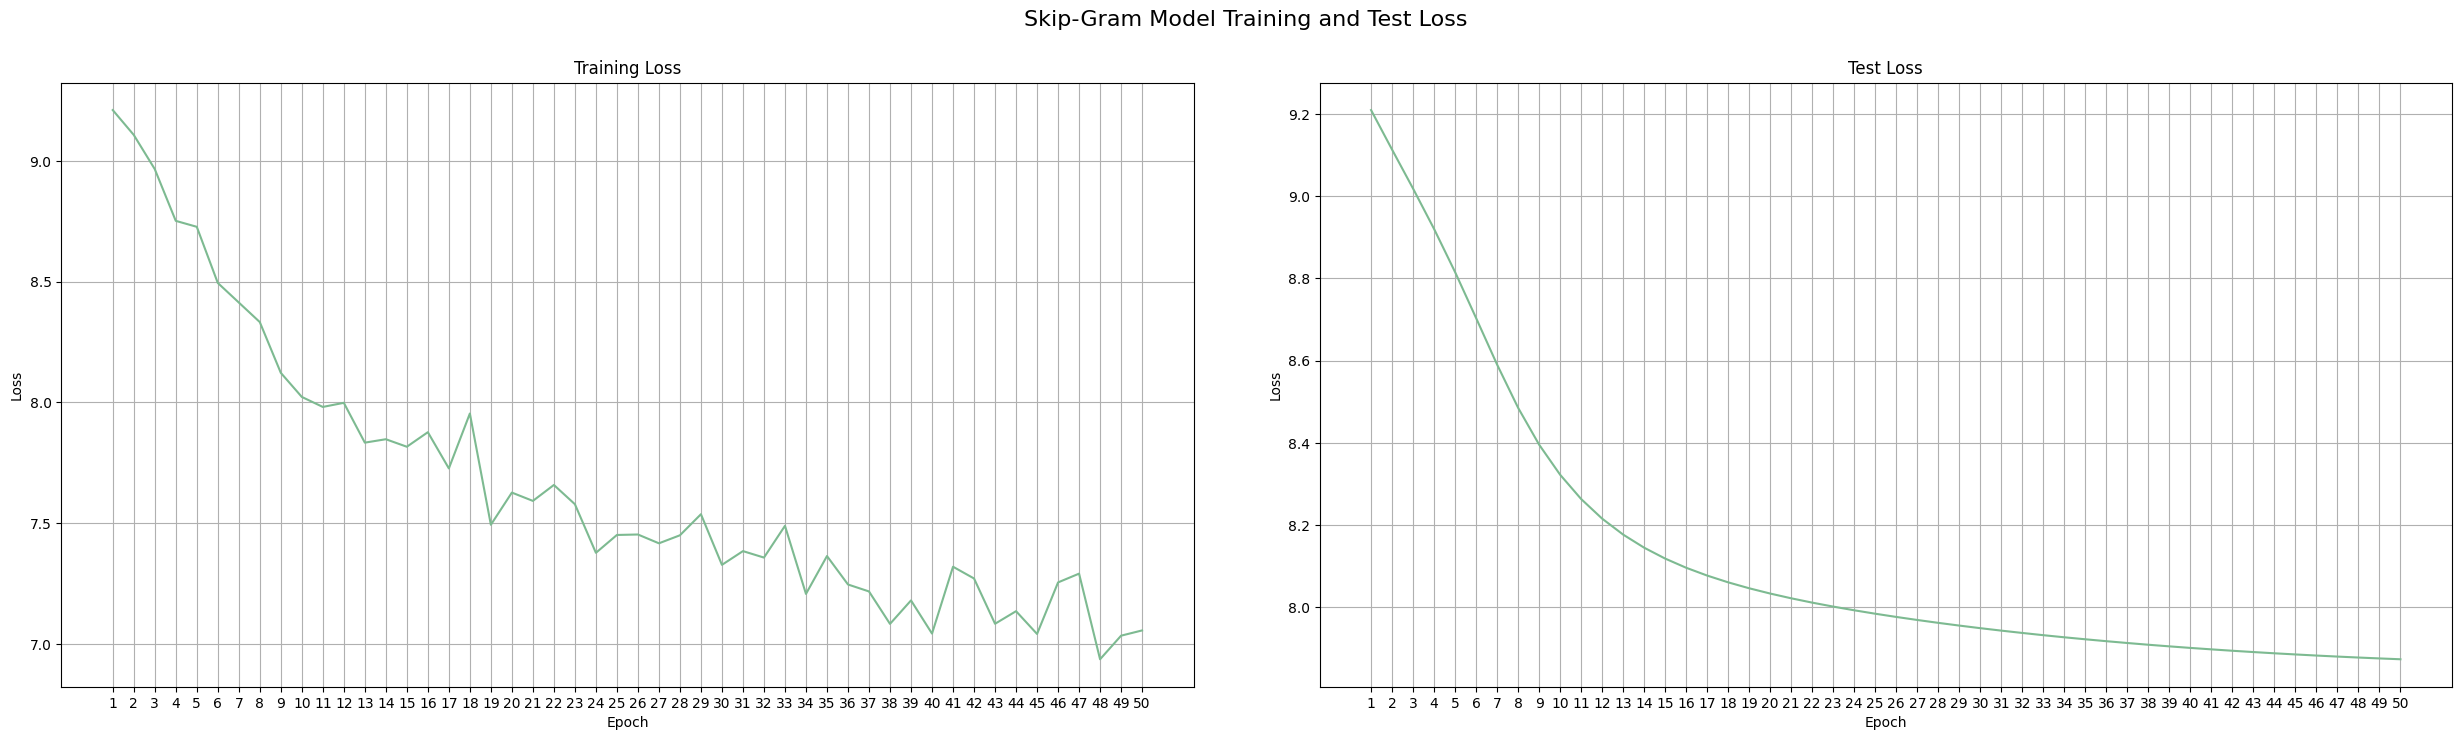

In [201]:
epochs = len(train_losses)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 8))
fig.tight_layout(pad=6.0)

axes = axes.flatten()

epoch_ticks = list(range(1, epochs + 1))

fig.suptitle('Skip-Gram Model Training and Test Loss', fontsize=16)

axes[0].plot(epoch_ticks, train_losses, zorder=2)
axes[0].set_title('Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].grid(True, zorder=0)
axes[0].set_ylabel('Loss')
axes[0].set_xticks(epoch_ticks)

axes[1].plot(epoch_ticks, test_losses, zorder=2)
axes[1].set_title('Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].grid(True, zorder=0)
axes[1].set_ylabel('Loss')
axes[1].set_xticks(epoch_ticks)

plt.show()

The training loss decreases relatively steady, a minimum in the test set is already reached at epoch 3. Since this approach should only demonstrate how such a model could look we continue with these results. In a real world application it would make sense to perhaps increase the model capacity and epochs to see if after some time the model might self-regularize and lead to a double-descent or similar phenomenons.

In [202]:
def get_movie_embedding(model, movie_id):
    movie_id_tensor = torch.tensor([movie_id], dtype=torch.long, device=device)
    with torch.no_grad():
        movie_embedding = model.embeddings(movie_id_tensor)
    return movie_embedding

def get_multiple_movie_embeddings(model, movie_ids):
    movie_ids_tensor = torch.tensor(movie_ids, dtype=torch.long, device=device)
    with torch.no_grad():
        embeddings = model.embeddings(movie_ids_tensor)
    return embeddings

**Step 6**: Preparing Sequences for RNN training

To train the RNN I introduce the `MovieSequenceDataset` class which acts as a wrapper around torch's `Dataset` class. This class will allow us to control the sequence length and embedding model to build trainable sequences of movies (which now arent one hot encoded vectors anymore but embedded vectors infered by the embedding model).

If the embedding model did its job, we should now have a vector space of movies where similar movies are closer to each other.

In [203]:
from torch.utils.data import DataLoader, Dataset

class MovieSequenceDataset(Dataset):
    def __init__(self, df, seq_length, embed_model):
        self.embed_model = embed_model
        self.embed_model.eval()
        self.df = df.groupby('userId')['movieId_seq'].apply(list)
        self.sequences = []
        self.labels = []
        for user_sequence in self.df:
            for i in range(len(user_sequence) - seq_length):
                self.sequences.append(user_sequence[i:i+seq_length])
                self.labels.append(user_sequence[i+seq_length])

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sequence_embeddings = torch.stack([self.embed_model.embeddings(torch.tensor(mid, dtype=torch.long).to(device)) for mid in self.sequences[idx]])
        label_embedding = self.embed_model.embeddings(torch.tensor(self.labels[idx], dtype=torch.long).to(device))
        
        return sequence_embeddings, label_embedding

seq_length = 5 
dataset = MovieSequenceDataset(df_movieratings, seq_length, embedding_model)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 78228
Number of testing samples: 19558


**Step 7**: Defining an RNN architecture

To keep it simple I defined the following RNN which uses an LSTM-cell with a variable number of hidden layers. The input size will now, as already vaguely mentioned, be a 128-dimensional vector, representing an embedded movie. Thus the output of the RNN will also be the same vector dimension. 

In [204]:
class MoviePredictorRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(MoviePredictorRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        out = self.linear(out[:, -1, :])
        return out

input_dim = 64
hidden_dim = 128
num_layers = 3
output_dim = 64

rnn_model = MoviePredictorRNN(input_dim, hidden_dim, num_layers, output_dim)

In [205]:
def train_and_evaluate_model(model, train_loader, test_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    best_loss = float('inf')
    best_epoch = None
    model_save_path = "models/best_rnn_model.pt"
    
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0

        for sequences, labels in train_loader:
            sequences, labels = sequences.to(device), labels.to(device)

            outputs = model(sequences)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for sequences, labels in test_loader:
                sequences, labels = sequences.to(device), labels.to(device)

                outputs = model(sequences)
                loss = criterion(outputs, labels)
                total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        if avg_test_loss < best_loss:
            best_loss = avg_test_loss
            best_epoch = epoch + 1
            torch.save(model.state_dict(), model_save_path)
            print(f'New best model found in Epoch {best_epoch}. Model was saved ✅')

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    print('Training complete')

    best_model = model.load_state_dict(torch.load(model_save_path))
    
    return best_model, train_losses, test_losses

rnn_model.to(device)

num_epochs = 10
learning_rate = 0.001

rnn_model, train_losses, test_losses = train_and_evaluate_model(rnn_model, train_loader, test_loader, num_epochs, learning_rate)

New best model found in Epoch 1. Model was saved ✅
Epoch 1/10, Train Loss: 1.0914, Test Loss: 1.0878
New best model found in Epoch 2. Model was saved ✅
Epoch 2/10, Train Loss: 1.0824, Test Loss: 1.0842
New best model found in Epoch 3. Model was saved ✅
Epoch 3/10, Train Loss: 1.0787, Test Loss: 1.0836
New best model found in Epoch 4. Model was saved ✅
Epoch 4/10, Train Loss: 1.0752, Test Loss: 1.0831
Epoch 5/10, Train Loss: 1.0715, Test Loss: 1.0833
Epoch 6/10, Train Loss: 1.0668, Test Loss: 1.0850
Epoch 7/10, Train Loss: 1.0614, Test Loss: 1.0870
Epoch 8/10, Train Loss: 1.0552, Test Loss: 1.0900
Epoch 9/10, Train Loss: 1.0483, Test Loss: 1.0942
Epoch 10/10, Train Loss: 1.0410, Test Loss: 1.0995
Training complete


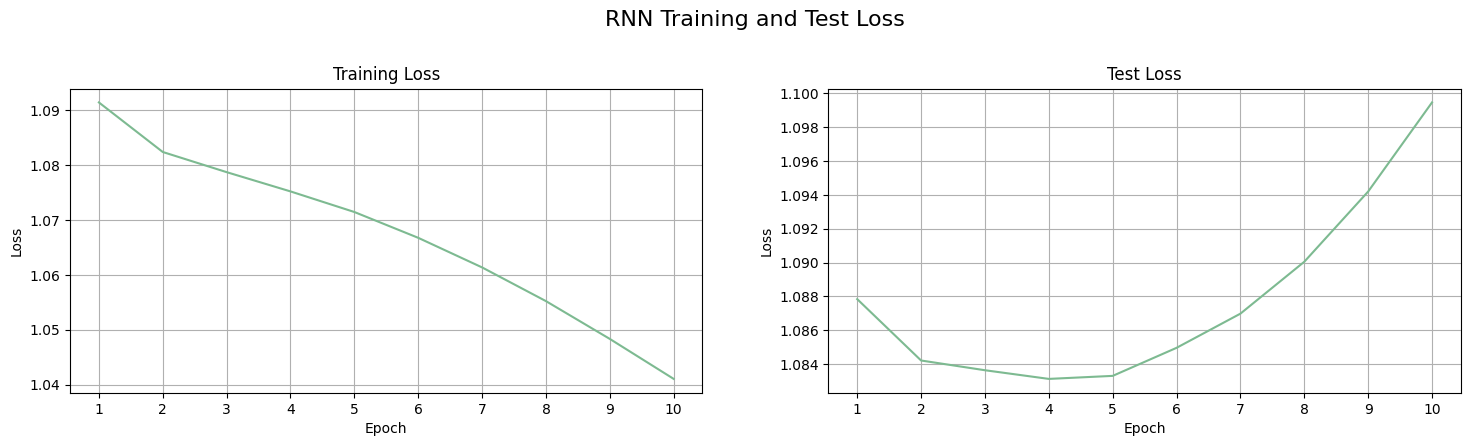

In [206]:
epochs = len(train_losses)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.tight_layout(pad=6.0)

axes = axes.flatten()

epoch_ticks = list(range(1, epochs + 1))

fig.suptitle('RNN Training and Test Loss', fontsize=16)

axes[0].plot(epoch_ticks, train_losses, zorder=2)
axes[0].set_title('Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].grid(True, zorder=0)
axes[0].set_ylabel('Loss')
axes[0].set_xticks(epoch_ticks)

axes[1].plot(epoch_ticks, test_losses, zorder=2)
axes[1].set_title('Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].grid(True, zorder=0)
axes[1].set_ylabel('Loss')
axes[1].set_xticks(epoch_ticks)

plt.show()

The RNN shows to steadily decrease in training loss, indicating that it can learn the training set.

**Loading Model Parameters**

In [207]:
model = MoviePredictorRNN(input_dim, hidden_dim, num_layers, output_dim)
model.load_state_dict(torch.load('models/best_rnn_model.pt', map_location=device))
model.to(device)
model.eval()

embedding_model = SkipGramModel(vocab_size=vocab_size + 1, embedding_dim=embedding_dim)
embedding_model.load_state_dict(torch.load('models/best_embedding_model.pt', map_location=device))
embedding_model.to(device)
embedding_model.eval()

SkipGramModel(
  (embeddings): Embedding(9743, 64)
  (output_layer): Linear(in_features=64, out_features=9743, bias=True)
)

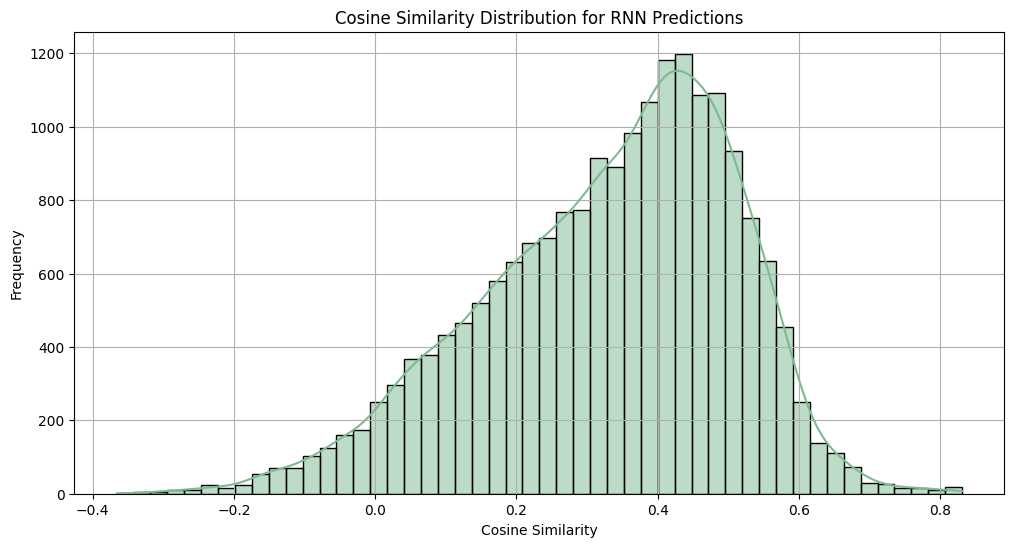

--- RNN Cosine Results ---
Mean Cosine Similarity: 0.3310
Median Cosine Similarity: 0.3594
Min Cosine Similarity: -0.3658
Max Cosine Similarity: 0.8309


In [209]:
def evaluate_rnn(rnn_model, test_dataloader, movie_embeddings):
    movie_embeddings = torch.tensor(movie_embeddings, device='cuda' if torch.cuda.is_available() else 'cpu').T

    cosine_similarities = []

    for sequences, labels in test_dataloader:
        sequences, labels = sequences.to(device), labels.to(device)
        predictions = rnn_model(sequences)
        predicted_embeddings = torch.matmul(predictions, movie_embeddings)
        actual_embeddings = torch.matmul(labels, movie_embeddings)
        cosine_similarities.extend([nn.functional.cosine_similarity(p, a, dim=0).item() for p, a in zip(predicted_embeddings, actual_embeddings)])
        
    plt.figure(figsize=(12, 6))
    
    sns.histplot(cosine_similarities, bins=50, kde=True)
    plt.title('Cosine Similarity Distribution for RNN Predictions')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    print('--- RNN Cosine Results ---')
    print(f'Mean Cosine Similarity: {np.mean(cosine_similarities):.4f}')
    print(f'Median Cosine Similarity: {np.median(cosine_similarities):.4f}')
    print(f'Min Cosine Similarity: {np.min(cosine_similarities):.4f}')
    print(f'Max Cosine Similarity: {np.max(cosine_similarities):.4f}')
    
evaluate_rnn(model, test_loader, embedding_model.embeddings.weight.cpu().detach().numpy())

In [212]:
from sklearn.metrics.pairwise import cosine_similarity

def rnn_recommend(rnn_model, embedding_model, movie_embeddings, user_sequence, top_n=10, df_movies=df_movies):
    embeddings = get_multiple_movie_embeddings(embedding_model, user_sequence)
    
    pred = rnn_model(embeddings.unsqueeze(0)).cpu()

    similarities = cosine_similarity(pred.detach().numpy(), movie_embeddings)
    similar_movies_indices = np.argsort(similarities, axis=1)[:, -top_n:][:, ::-1]
    similar_movies = similar_movies_indices.flatten()

    display(df_movies.loc[similar_movies]['title'])

In [213]:
rnn_recommend(rnn_model=model,
              embedding_model=embedding_model,
              movie_embeddings=embedding_model.embeddings.weight.cpu().detach().numpy(),
              user_sequence=[1, 14, 51],
              top_n=10)

593    Cemetery Man (Dellamorte Dellamore) (1994)
327     Mrs. Parker and the Vicious Circle (1994)
261             Picture Bride (Bijo photo) (1994)
193                              Drop Zone (1994)
85                  In the Bleak Midwinter (1995)
419                             Kalifornia (1993)
413              In the Name of the Father (1993)
323                          Little Buddha (1993)
21                                 Copycat (1995)
335                             Speechless (1994)
Name: title, dtype: object

### Exercise 10 - Compare all RS that you build in this challenge (6 points)
Compile a table with the performance metrics of exercise 3 for all RS from this MC (Make sure to include also the baseline RS). Also generate comparative plots. Discuss.

In [215]:
result_store.get_results()

,recommender_name,rmse,best_parameters,average_precision_at_k,average_recall_at_k
0,BaselineRecommender,0.878030,"{'beta_u': 15, 'beta_i': 5}",0.631475,0.673646
1,UserCF,0.907477,"{'K': 50, 'similarity': 'cosine'}",0.719563,0.534278
2,ItemCF,0.920517,"{'K': 1, 'similarity': 'pearson'}",0.670383,0.510820
3,HybridRecommender,0.858249,"{'weights': [0.25, 0.25, 0.5]}",0.711257,0.538181
4,SVDRecommender,0.872991,{'n_factors': 3},0.731585,0.539449


### Exercise 11 - Risks of RS on user or society (5 points)
In this exercise we take one step back from the technical aspects of RS.
Positive effects of good recommendations are easy to imagine: Happy customers and successful companies. However  also come with potential risks. Which risks for the user or society can you imagine or discover online? Pick one risk and describe what you would do to mitigate this problem.

#### Filter Bubbles
One significant risk associated with recommendation systems is the creation of "filter bubbles," where users are exposed only to information that aligns with their existing beliefs and preferences. This can lead to increased polarization and a lack of diverse perspectives, ultimately harming societal cohesion and stifling intellectual growth.

> *"The question before us is the ethics of leading people down hateful rabbit holes full of misinformation and lies at scale just because it works to increase the time people spend on the site – and it does work"* - Zeynep Tufekci, Sociologist at Princeton University

To mitigate this issue, I would implement a feature inside a recommener that periodically introduces **diverse** and **high-quality content** outside the user's usual consumption patterns. This could include recommendations from reputable sources with varying viewpoints, content selected through editorial curation, or even community recommendations. It is a bad practice to solely let a recommender pick new items to show to the user based on that user's past patterns - This is what introduces these potentially dangerous patterns. The system would maintain a balance between satisfying user preferences and broadening their horizons. Transparency about how recommendations are generated would also encourage user trust and provide them the option to fine-tune their exposure settings to prioritize varied perspectives.

Such measures could help users step out of their comfort zones with a more balanced view of the world and reducing the negative impacts of echo chambers.

#### Inappropriate or unethical content
Another big negative factor (or thus Risk) is the publication of **unethical and inappropriate content**. Currently the US congress is debating about banning the social media short-form platform "TikTok" from the US market because next to concerns of user privacy (regarding suspicion of Chinese spyware built into the app), the platform also struggles with the **amplification of harmful content**. The recommendation system of TikTok has been shown to amplify the spread of inappropriate, unethical, or even dangerous content, such as misinformation, hate speech, and content targeting children.

TikTok's online recommendation system is very sophisticated and can promote a new video to hundreds of millions of users within just a few hours after posting. The system shows a new video to a handful of users on their feed, those users' interactions are then measured. If the handful of users did interact, the video gets shown to a larger sample of users. This process is repeated until the new cohort (or bucket) of users stops interacting. This process can lead to videos with harmful content to rise to the top of the most watched videos within a single day.

Often times the social media platforms that fight against dangerous content still follow old procedures to remove that content from being recommended. For example Facebook still uses manual reports made by users which open a ticket on Facebooks side for their content-policy teams to look at reported items and remove them manually. Detecting harmful content has gotten very difficult as there are techniques like *adversarial attacks* that prevent these detection systems from picking up on inappropriate content.

#### Doomscrolling
Mentioning the harms of platforms like TikTok doesn't go without mentioning the addictive nature of such apps.

Social media addiction is a growing concern, leading to reduced productivity, impaired mental health, and decreased real-world social interactions. The endless scrolling (called *doomscrolling*), notifications, and **targeted recommendations** can trigger dopamine-driven behaviors, similar to gambling, keeping users glued to their screens. Next to the dopamine inducing content, the apps themselves often times have very similar UI/UX as gambling systems, with satisfying animations and sounds.

As a Data Scientist I could mainly influence the recommendation process; An idea I had to improve a system in that regard is to optimize recommendation systems to prioritize meaningful, high-quality content that aligns with users' goals and well-being rather than purely engagement-based metrics. For instance, a system could give educational or positive content more weight when returning a top N list instead of inherently recommending items that will maximize user interaction (which is usually harmful content with misinformation).

**Read the Guidelines for Implementation and Submission one more time.**